## <a id='table of contents'> <b>ПЛАН РАБОТЫ: </b></a>    
<a href='#part1'> <b> 1. ПОСТАНОВКА ЗАДАЧИ </b></a>  
<a href='#part2'> 1.1. Загрузка и описание данных </a>   
<a href='#part3'> 1.2. Характеристика исходных данных </a>   
<a href='#part4'> 1.3. Вывод 1 </a>   
<a href='#part5'> <b> 2. ПРЕДОБРАБОТКА ДАННЫХ</b> </a>     
<a href='#part6'> 2.1. Расход электроэнергии </a>     
<a href='#part7'> 2.2. Сыпучие материалы </a>   
<a href='#part8'> 2.3. Проволочные материалы</a>  
<a href='#part9'> 2.4. Продувка сплава газом</a>    
<a href='#part10'> 2.5. Измерение температуры</a>  
<a href='#part11'> 2.6. Вывод 2 </a>     
<a href='#part12'> <b> 3. ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ </b> </a>   
<a href='#part13'> 3.1. Визуализация данных, описание распределений </a>   
<a href='#part14'> 3.2. Поиск и очистка выбросов </a>   
<a href='#part15'> 3.3. Поиск корреляции в данных</a>   
<a href='#part16'> 3.4. Выбор данных для обучения. Создание объединенного датасета </a>   
<a href='#part17'> 3.5. Вывод 3 </a>   
<a href='#part18'> <b> 4. ОБУЧЕНИЕ МОДЕЛЕЙ</b> </a>    
<a href='#part19'> 4.1. Подготовка данных к обучению</a>    
<a href='#part20'> 4.2. Обучение модели линейной регрессии </a>   
<a href='#part21'> 4.3. Обучение модели дерева решений </a>   
<a href='#part22'> 4.4. Обучение модели случайного леса </a>   
<a href='#part23'> 4.5. Обучение модели градиентного бустинга </a>   
<a href='#part24'> 4.6. Обучение модели нейронной сети </a>   
<a href='#part25'> 4.7.  Вывод 4 </a>   
<a href='#part26'> <b> 5. ПРОВЕРКА КАЧЕСТВА МОДЕЛЕЙ </b> </a>   
<a href='#part27'> 5.1 Проверка моделей на тестовых данных </a>   
<a href='#part28'> 5.2 Выбор лучшей модели. Проверка модели на адекватность</a>   
<a href='#part29'> 5.3 Вывод 5 </a>   
<a href='#part30'> <b> 6. ОБЩИЙ ВЫВОД ПО РАБОТЕ. РЕКОМЕНДАЦИИ ДЛЯ ЗАКАЗЧИКА </b> </a>   

# <a id='part1'>1. ПОСТАНОВКА ЗАДАЧИ</a>
<a href='#table of contents'>к оглавлению</a>

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Необходимо построить модель, которая предскажет температуру стали в печи-ковше.  
***Цель:*** Построить модель машинного обучения, которая будет предсказывать температуру стали в печи-ковше     
***Целевая метрика:*** MAE   

# <a id='part2'> 1.1. Загрузка и описание данных</a>
<a href='#table of contents'>к оглавлению</a>

### Описание признаков ###
***data_arc.csv*** — данные расходе электроэнергии;  
***data_bulk.csv*** — данные о подаче сыпучих материалов (объём);  
***data_bulk_time.csv*** — данные о подаче сыпучих материалов (время);  
***data_gas.csv*** — данные о продувке сплава газом;  
***data_temp.csv*** — результаты измерения температуры;  
***data_wire.csv*** — данные о проволочных материалах (объём);    
***data_wire_time.csv*** — данные о проволочных материалах (время).

### Целевой признак ###
конечная температура

Загрузим данные и необходимые библиотеки

In [1]:
!pip install wheel
!pip install lightgbm

You should consider upgrading via the 'c:\users\hjhkljhgfd\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\hjhkljhgfd\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
conda install catboost

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
try:
    df_arc=pd.read_csv('data_arc.csv', sep=',') 
    df_bulk=pd.read_csv('data_bulk.csv', sep=',') 
    df_bulk_time=pd.read_csv('data_bulk_time.csv', sep=',') 
    df_gas=pd.read_csv('data_gas.csv', sep=',') 
    df_temp=pd.read_csv('data_temp.csv', sep=',') 
    df_wire=pd.read_csv('data_wire.csv', sep=',') 
    df_wire_time=pd.read_csv('data_wire_time.csv', sep=',')    
except: 
    df_arc=pd.read_csv('data_arc.csv', sep=',') 
    df_bulk=pd.read_csv('data_bulk.csv', sep=',') 
    df_bulk_time=pd.read_csv('data_bulk_time.csv', sep=',') 
    df_gas=pd.read_csv('data_gas.csv', sep=',') 
    df_temp=pd.read_csv('data_temp.csv', sep=',') 
    df_wire=pd.read_csv('data_wire.csv', sep=',') 
    df_wire_time=pd.read_csv('data_wire_time.csv', sep=',')   
    pd.options.display.float_format = '{:.2f}'.format

# <a id='part3'> 1.2. Характеристика исходных данных.</a>
<a href='#table of contents'>к оглавлению</a>

Выведем по 50 первых строк для каждой таблицы

In [4]:
df_sum=[df_arc, df_bulk, df_bulk_time, df_gas, df_temp, df_wire, df_wire_time]

In [5]:
for i in df_sum: 
    display(i.head(50))

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.438063,0.283043
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,1.296415,0.892914
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.490377,0.305281
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.827743,0.516874
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.062053,0.671494


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
5,6,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,201.0,154.0
6,7,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,152.0,154.0
7,8,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.0,NaN,252.0,153.0
8,9,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,99.0,203.0
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,102.0,204.0


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56
5,6,NaN,NaN,NaN,2019-05-03 13:59:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:53:27,NaN,2019-05-03 13:53:27,2019-05-03 13:53:27
6,7,NaN,NaN,NaN,2019-05-03 14:29:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:22:19,NaN,2019-05-03 14:22:19,2019-05-03 14:22:19
7,8,NaN,NaN,NaN,2019-05-03 15:04:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:55:46,NaN,2019-05-03 14:55:46,2019-05-03 14:55:46
8,9,NaN,NaN,NaN,2019-05-03 15:47:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 15:41:00,NaN,2019-05-03 15:41:00,2019-05-03 15:41:00
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 16:18:52,NaN,2019-05-03 16:18:52,2019-05-03 16:18:52


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
5,6,11.273392
6,7,9.836267
7,8,15.171553
8,9,8.216623
9,10,6.529891


,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
5,2,2019-05-03 11:37:27,1581.0
6,2,2019-05-03 11:38:00,1577.0
7,2,2019-05-03 11:49:38,1589.0
8,2,2019-05-03 11:55:50,1604.0
9,2,2019-05-03 11:58:24,1608.0


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,99.109917,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,98.061600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,155.282394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,113.393279,9.143681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,81.244796,12.376000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2019-05-03 13:59:02,2019-05-03 13:59:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2019-05-03 14:28:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2019-05-03 15:03:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2019-05-03 15:42:43,2019-05-03 15:58:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,2019-05-03 16:20:25,2019-05-03 16:21:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Выведем информацию о таблицах

In [6]:
for i in df_sum:
    display(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


None

Выведем количество уникальных партий для каждой таблицы

In [7]:
for i in df_sum:
    display(i['key'].unique())

array([   1,    2,    3, ..., 3239, 3240, 3241], dtype=int64)

array([   1,    2,    3, ..., 3239, 3240, 3241], dtype=int64)

array([   1,    2,    3, ..., 3239, 3240, 3241], dtype=int64)

array([   1,    2,    3, ..., 3239, 3240, 3241], dtype=int64)

array([   1,    2,    3, ..., 3239, 3240, 3241], dtype=int64)

array([   1,    2,    3, ..., 3239, 3240, 3241], dtype=int64)

array([   1,    2,    3, ..., 3239, 3240, 3241], dtype=int64)

Выведем сумму значений партий для каждой таблицы: 

In [8]:
for i in df_sum:
    display(i['key'].unique().sum())

5216519

5082696

5082696

5253209

5216993

5001777

5001777

***Описание данных:*** 

Количество строк в таблицах не совпадает, что связано с технологией процесса. Для получения необходимой марки сталь
корректируется по составу и температуре за счет нагрева электродами и присадки легирующих материаллов. Так как исходный состав 
для каждой партии различен, то и легирующие добавляются разные в каждом случае, поэтому мы наблюдаем большое количество
пропусков в данных по сыпучим материаллам. При этом нагрев стали необходим после каждого ввода легиурющих и шлакообразующих,
так как затрачивается тепло на их растворение и нагрев. По этой причине в таблице с данными по мощности больше всего строк, не
считая таблицу с температурой. В таблице с температурой строк больше чем в таблице с мощностью, так как часть стали либо идет 
в брак, либо идет сразу на разливку без подогрева и на эти операции энергия не тратится. Количество партий в каждой таблице одинаковое и содержит 3241 партию, но при этом сумма значений различается. Это указывает на то, что одна и та же партия может быть обработана несколько раз на разных технологических этапах, поэтому необходимо использовать интегральные показатели по каждой партии. Также возможны ошибки в данных вызванные человеческими или техническими причинами.

# <a id='part4'> 1.3. Вывод 1.</a>
<a href='#table of contents'>к оглавлению</a>

 ***Для дальнейшей работы необходимо:*** 
- Удалить партии, которые содержат только 1 температуру; 
- Использовать начальную температуру партии для обучающей выборки и конечную в качестве целевого признака; 
- Использовать интегральные показатели по сыпучим материалам, расходу электроэнергии и газа по каждой партии;
- Привести данные с указанием времени к типу DataTime; 
- Переименовать названия столбцов на латиницу;
- Обработать пропуски, выбросы и дубликаты в данных.

# <a id='part5'>2. ПРЕДОБРАБОТКА ДАННЫХ</a>
<a href='#table of contents'>к оглавлению</a>

# <a id='part6'>2.1. Расход электроэнергии</a>

Переименуем столбцы

In [9]:
df_arc.rename(columns={'Начало нагрева дугой': 'start_heating', 'Конец нагрева дугой': 'stop_heating',
                      'Активная мощность': 'active_power', 'Реактивная мощность': 'reactive_power'}, inplace=True)
print(df_arc.columns)

Index(['key', 'start_heating', 'stop_heating', 'active_power',
       'reactive_power'],
      dtype='object')


Приведем данные о времени нагрева к типу DateTime

In [10]:
#создадим функцию для изменения типа данных
def to_date_time(data):
    data=pd.to_datetime(data)
    display(data)
    return data

In [11]:
df_arc['start_heating']=to_date_time(df_arc['start_heating'])
df_arc['stop_heating']=to_date_time(df_arc['stop_heating'])

0       2019-05-03 11:02:14
1       2019-05-03 11:07:28
2       2019-05-03 11:11:44
3       2019-05-03 11:18:14
4       2019-05-03 11:26:09
                ...        
14871   2019-09-01 03:58:58
14872   2019-09-01 04:05:04
14873   2019-09-01 04:16:41
14874   2019-09-01 04:31:51
14875   2019-09-01 04:34:47
Name: start_heating, Length: 14876, dtype: datetime64[ns]

0       2019-05-03 11:06:02
1       2019-05-03 11:10:33
2       2019-05-03 11:14:36
3       2019-05-03 11:24:19
4       2019-05-03 11:28:37
                ...        
14871   2019-09-01 04:01:35
14872   2019-09-01 04:08:04
14873   2019-09-01 04:19:45
14874   2019-09-01 04:32:48
14875   2019-09-01 04:36:08
Name: stop_heating, Length: 14876, dtype: datetime64[ns]

Посчитаем количество нулевых значений по расходу электроэнергии

In [12]:
print(df_arc.query('active_power == 0').sum()) 
print(df_arc.query('reactive_power == 0').sum()) 

key               0.0
start_heating     0.0
stop_heating      0.0
active_power      0.0
reactive_power    0.0
dtype: float64
key               0.0
start_heating     0.0
stop_heating      0.0
active_power      0.0
reactive_power    0.0
dtype: float64


# <a id='part7'> 2.2. Сыпучие материалы</a>
<a href='#table of contents'>к оглавлению</a>

Заполним пропуски нулевыми значениями в таблицах о времени засыпки и количестве легирующих материалов

In [13]:
df_bulk_time=df_bulk_time.fillna(0)
df_bulk=df_bulk.fillna(0)
print(df_bulk_time.info())
print(df_bulk.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   3129 non-null   object
 2   Bulk 2   3129 non-null   object
 3   Bulk 3   3129 non-null   object
 4   Bulk 4   3129 non-null   object
 5   Bulk 5   3129 non-null   object
 6   Bulk 6   3129 non-null   object
 7   Bulk 7   3129 non-null   object
 8   Bulk 8   3129 non-null   object
 9   Bulk 9   3129 non-null   object
 10  Bulk 10  3129 non-null   object
 11  Bulk 11  3129 non-null   object
 12  Bulk 12  3129 non-null   object
 13  Bulk 13  3129 non-null   object
 14  Bulk 14  3129 non-null   object
 15  Bulk 15  3129 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   ----------

Приведем данные о времени засыпки материалов к типу Datetime

In [14]:
df_bulk_time=df_bulk_time.apply(pd.to_datetime)
df_bulk_time['key']=df_bulk_time['key'].astype('int64')
print(df_bulk_time.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   Bulk 1   3129 non-null   datetime64[ns]
 2   Bulk 2   3129 non-null   datetime64[ns]
 3   Bulk 3   3129 non-null   datetime64[ns]
 4   Bulk 4   3129 non-null   datetime64[ns]
 5   Bulk 5   3129 non-null   datetime64[ns]
 6   Bulk 6   3129 non-null   datetime64[ns]
 7   Bulk 7   3129 non-null   datetime64[ns]
 8   Bulk 8   3129 non-null   datetime64[ns]
 9   Bulk 9   3129 non-null   datetime64[ns]
 10  Bulk 10  3129 non-null   datetime64[ns]
 11  Bulk 11  3129 non-null   datetime64[ns]
 12  Bulk 12  3129 non-null   datetime64[ns]
 13  Bulk 13  3129 non-null   datetime64[ns]
 14  Bulk 14  3129 non-null   datetime64[ns]
 15  Bulk 15  3129 non-null   datetime64[ns]
dtypes: datetime64[ns](15), int64(1)
memory usage: 391.2 KB
None


# <a id='part8'> 2.3. Проволочные материалы </a>
<a href='#table of contents'>к оглавлению</a>

Заполним пропуски нулевыми значениями в таблицах о времени подачи и количестве проволочных материалов

In [15]:
df_wire_time=df_wire_time.fillna(0)
df_wire=df_wire.fillna(0)
print(df_wire_time.info())
print(df_wire.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3081 non-null   object
 2   Wire 2  3081 non-null   object
 3   Wire 3  3081 non-null   object
 4   Wire 4  3081 non-null   object
 5   Wire 5  3081 non-null   object
 6   Wire 6  3081 non-null   object
 7   Wire 7  3081 non-null   object
 8   Wire 8  3081 non-null   object
 9   Wire 9  3081 non-null   object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3081 non-null   float64
 2   Wire 2  3081 non-null   float64
 3   Wire 3  3081 non-null   float64
 4   Wire 4  3081 non-null   float64
 5   Wire 5  3081 non-null   float64
 

Приведем данные о времени подачи проволочных материалов к типу Datetime

In [16]:
df_wire_time=df_wire_time.apply(pd.to_datetime)
df_wire_time['key']=df_wire_time['key'].astype('int64')
print(df_wire_time.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   Wire 1  3081 non-null   datetime64[ns]
 2   Wire 2  3081 non-null   datetime64[ns]
 3   Wire 3  3081 non-null   datetime64[ns]
 4   Wire 4  3081 non-null   datetime64[ns]
 5   Wire 5  3081 non-null   datetime64[ns]
 6   Wire 6  3081 non-null   datetime64[ns]
 7   Wire 7  3081 non-null   datetime64[ns]
 8   Wire 8  3081 non-null   datetime64[ns]
 9   Wire 9  3081 non-null   datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB
None


# <a id='part9'> 2.4. Продувка сплава газом </a>
<a href='#table of contents'>к оглавлению</a>

Изменим название столбцов 

In [17]:
df_gas.rename(columns={'Газ 1': 'gas 1'}, inplace=True)
print(df_gas.columns)

Index(['key', 'gas 1'], dtype='object')


# <a id='part10'> 2.5. Измерение температуры </a>
<a href='#table of contents'>к оглавлению</a>

Изменим название столбцов

In [18]:
df_temp.rename(columns={'Время замера': 'time_determine', 'Температура': 'temperature'}, inplace=True)
print(df_temp.columns)

Index(['key', 'time_determine', 'temperature'], dtype='object')


Изменим тип данных с временем замера и округлим температуру до целых значений

In [19]:
df_temp['time_determine']=df_temp['time_determine'].apply(pd.to_datetime)
df_temp['temperature']=df_temp['temperature'].astype('Int64')
print(df_temp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   key             15907 non-null  int64         
 1   time_determine  15907 non-null  datetime64[ns]
 2   temperature     13006 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), int64(1)
memory usage: 388.5 KB
None


Удалим строки с отсутствием значения температуры 

In [20]:
print(df_temp['temperature'].isna().sum()) 
display(df_temp[df_temp['temperature'].isnull()].head(10)) 

2901


,key,time_determine,temperature
12268,2500,2019-08-06 03:24:43,<NA>
12269,2500,2019-08-06 03:25:16,<NA>
12270,2500,2019-08-06 03:28:21,<NA>
12272,2501,2019-08-06 04:01:59,<NA>
12273,2501,2019-08-06 04:14:35,<NA>
12274,2501,2019-08-06 04:22:14,<NA>
12275,2501,2019-08-06 04:31:14,<NA>
12277,2502,2019-08-06 04:46:04,<NA>
12278,2502,2019-08-06 04:52:32,<NA>
12279,2502,2019-08-06 04:57:30,<NA>


In [21]:
df_temp=df_temp.dropna().reset_index(drop=True)
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13006 entries, 0 to 13005
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   key             13006 non-null  int64         
 1   time_determine  13006 non-null  datetime64[ns]
 2   temperature     13006 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), int64(1)
memory usage: 317.7 KB


Удалим строки с единственным значением температуры по партии 

In [22]:
df_temp=df_temp.query('key != 195 and key !=279') 
display(df_temp)

,key,time_determine,temperature
0,1,2019-05-03 11:16:18,1571
1,1,2019-05-03 11:25:53,1604
2,1,2019-05-03 11:29:11,1618
3,1,2019-05-03 11:30:01,1601
4,1,2019-05-03 11:30:39,1613
...,...,...,...
13001,3237,2019-08-31 22:44:04,1569
13002,3238,2019-08-31 23:30:31,1584
13003,3239,2019-09-01 01:31:47,1598
13004,3240,2019-09-01 02:39:01,1617


# <a id='part11'> 2.6. Вывод 2 </a>

 - сделана начальная предобратка данных, а именно: 
 - переименованы столбцы;
 - пропуски заменены нулевыми значенимя; 
 - удалены аномальные значения, которых не долдно быть по логике или которые нерелванты для решения задачи; 
 - основная предобработка с удалением выбросов будет выполнена после более тщательного изучения данных

# <a id='part12'>3. ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ</a>
<a href='#table of contents'>к оглавлению</a>

# <a id='part13'> 3.1 Визуализация данных описание распределений </a>

По определению активная мощность - это мощность которая расхлодуется непосредственно на преобразование   
в тепловую энергию, а реактивная мощность это фактически потери. Следовательно активная мощность не может  
быть ниже 0, а реактивная может.

***Выведем частотное распределение замеров с реактивной мощностью ниже 0***

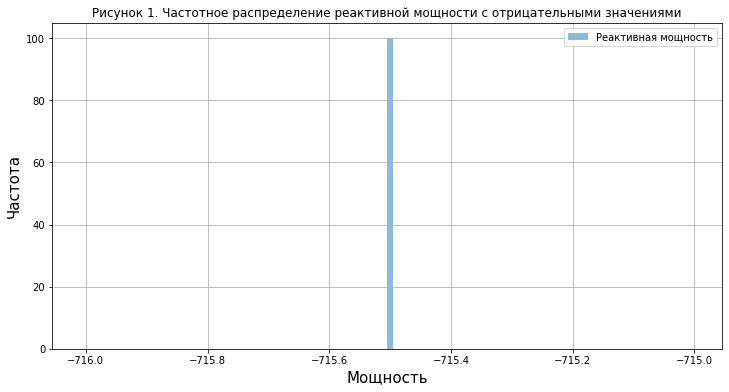

In [23]:
df_arc[df_arc['reactive_power'] < 0]['reactive_power'].plot(kind='hist', bins=100, figsize=(12,6),
                                                             alpha=.5, density=True,  
                    title='Рисунок 1. Частотное распределение реактивной мощности с отрицательными значениями',
                    label=('Реактивная мощность'), legend=True, grid=True)
plt.xlabel('Мощность', fontsize = 15)
plt.ylabel('Частота', fontsize = 15)
plt.show()

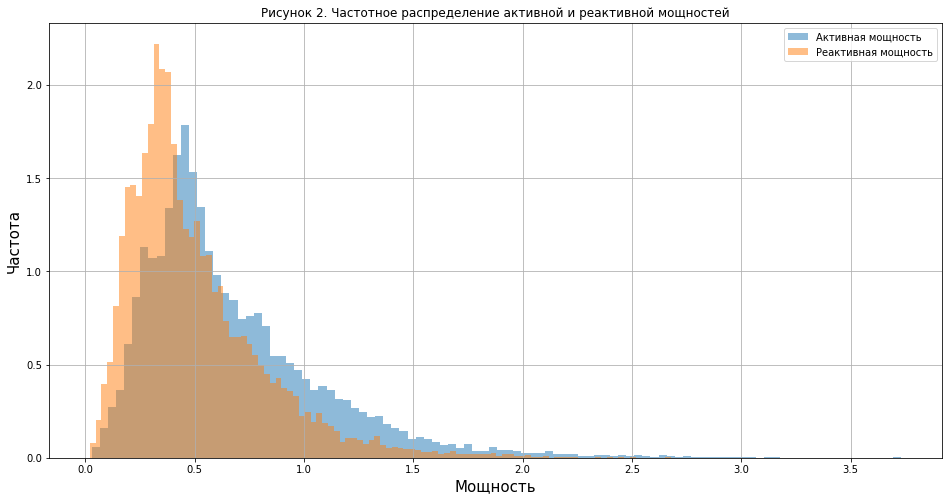

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_arc['active_power'].plot(kind='hist', bins=100, figsize=(16,8), alpha=.5, density=True, 
                            title='Рисунок 2. Частотное распределение активной и реактивной мощностей',
                label=('Активная мощность'), legend=True, grid=True, )

df_arc[df_arc['reactive_power'] > 0]['reactive_power'].plot(kind='hist', bins=100, 
                                                            figsize=(16,8), alpha=.5, density=True, 
                    label=('Реактивная мощность'), legend=True, grid=True)
plt.xlabel('Мощность', fontsize = 15)
plt.ylabel('Частота', fontsize = 15)
plt.show()

***Промежуточный вывод:*** Распределение является нормальным с хвостом по правой стороне. Видно, что данные признаки сильно 
скореллированы между собой. Отрицательное значение реактивной мощности наблюдается в 100 случаях и везде равняется -715.2. 
Возможно эти значения получены при каком-то особом режиме работы печи и лучше не использовать их при обучении. 

***Выведем частотное распределение данных по сыпучим материалам***

Создадим функцию для постройки графика

In [25]:
def graph_plot (data, bins, title): 
    data.plot(kind='hist', bins=bins, title=title, figsize=(16,8), alpha=.8, density=True, 
         legend=True, grid=True)
    plt.xlabel('Количество', fontsize = 15)
    plt.ylabel('Частота', fontsize = 15)
    plt.show()   

Выведем распределения только для материаллов, которые были использованы более 500 раз (Bulk - 3, 4, 6, 12, 14, 15).
Нулевые значения не учитываем.

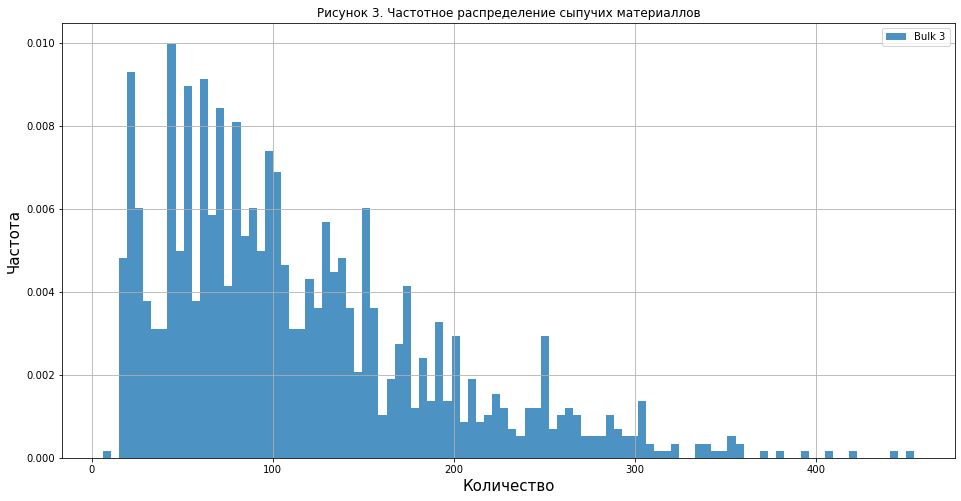

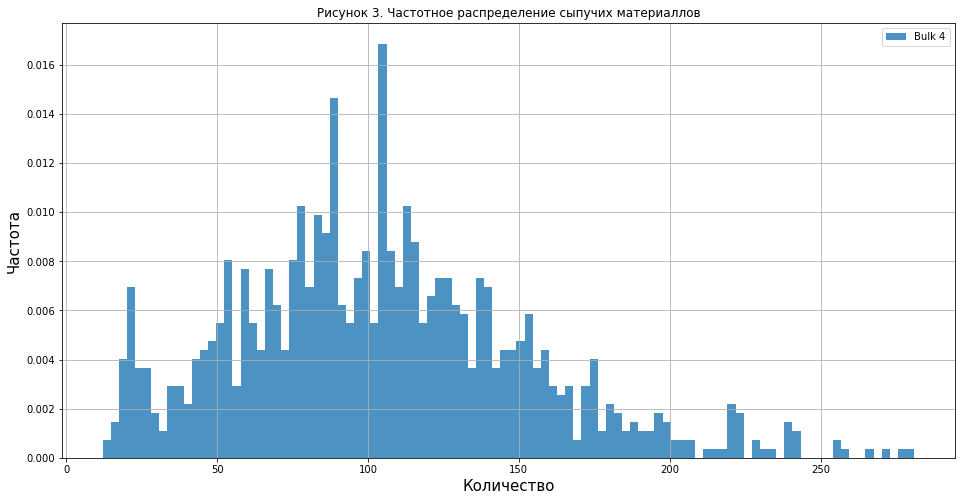

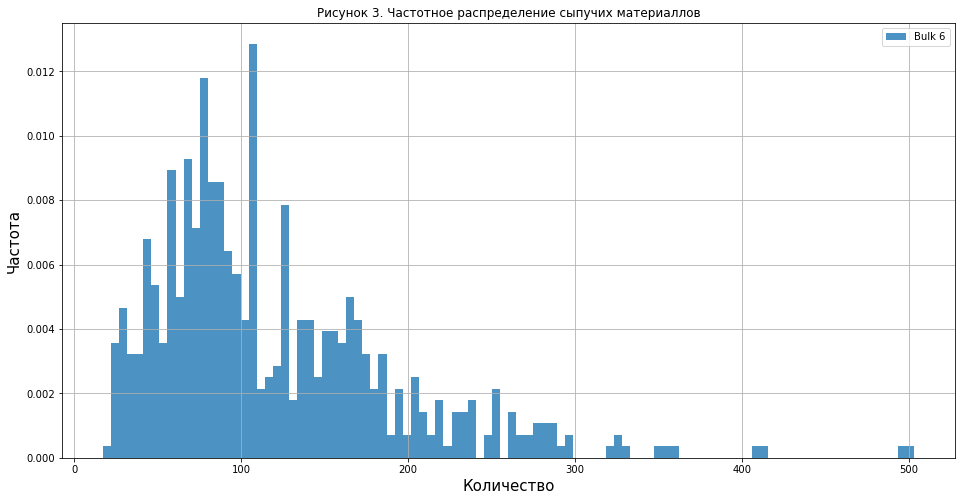

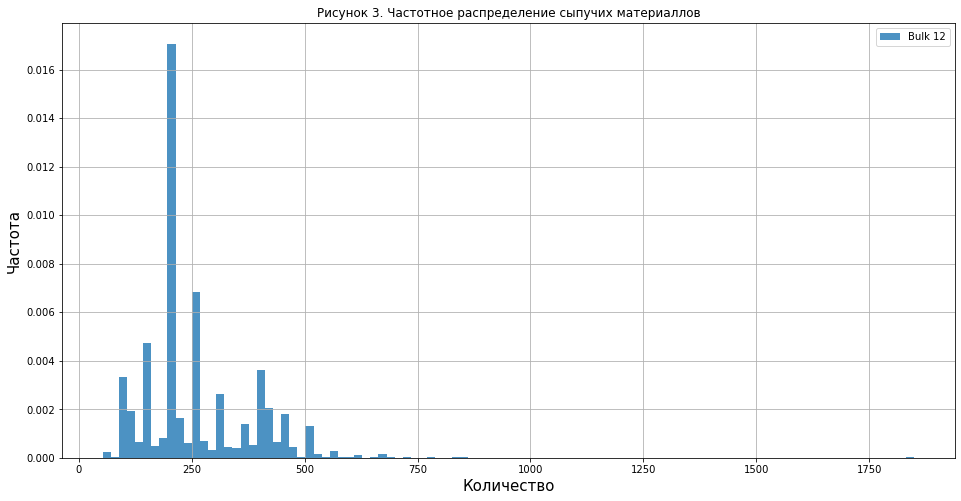

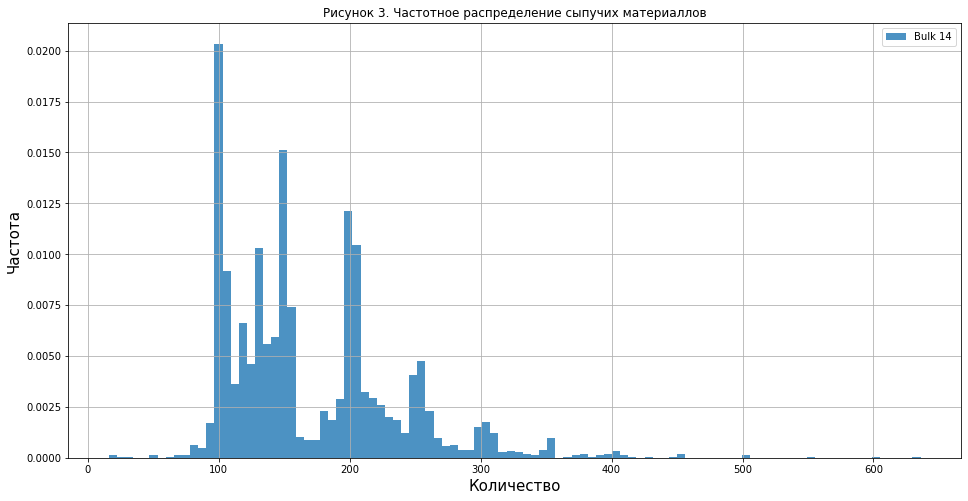

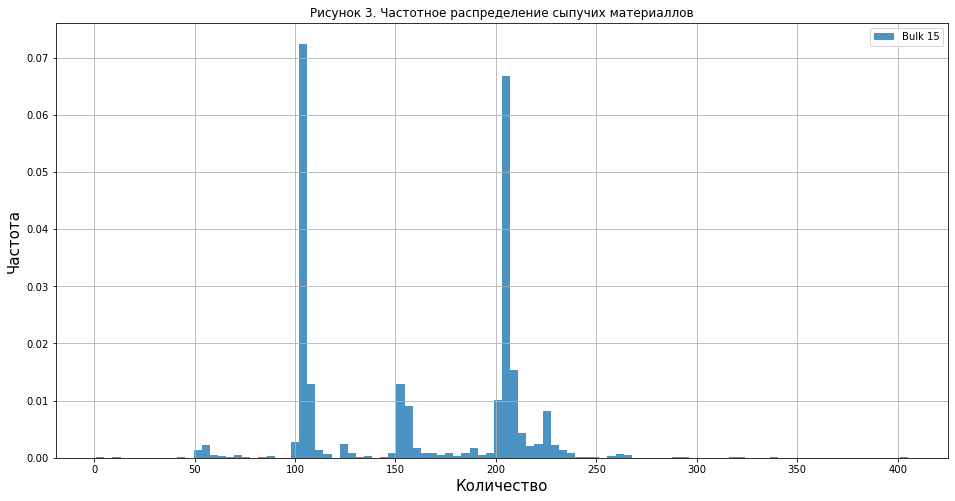

In [26]:
data_bulk=df_bulk[['Bulk 3', 'Bulk 4', 'Bulk 6', 'Bulk 12', 'Bulk 14', 'Bulk 15']]
title3='Рисунок 3. Частотное распределение сыпучих материаллов'
for i in data_bulk:
    graph_plot (df_bulk[df_bulk[i] > 0] [i], 100, title3) 

***Промежуточный вывод:*** Данные имеют значительный разброс в значениях, что вероятно связано с тем, что для каждой марки
стали используются свои сыпучие материалы. При этом часть материалов используются чаще, например bulk_3, bulk_4 и bulk_6. 

***Выведем частотное распределение данных по проволочным материалам***

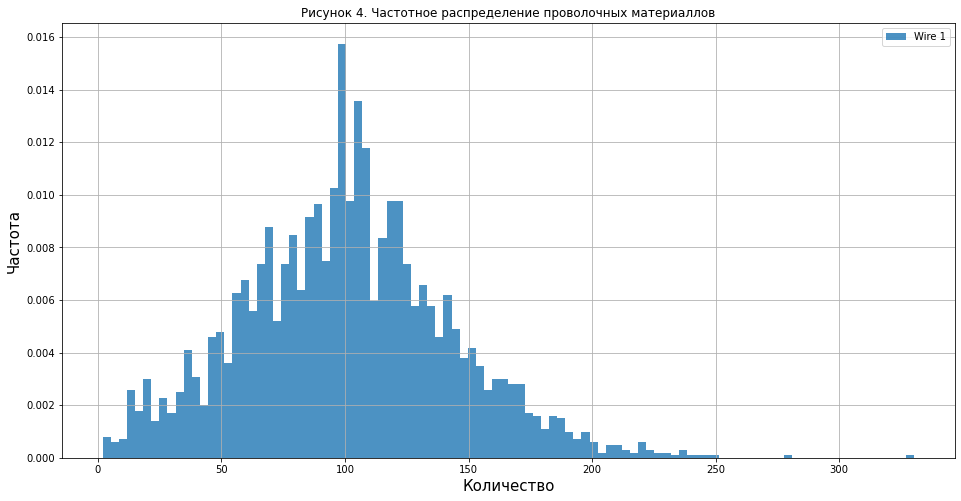

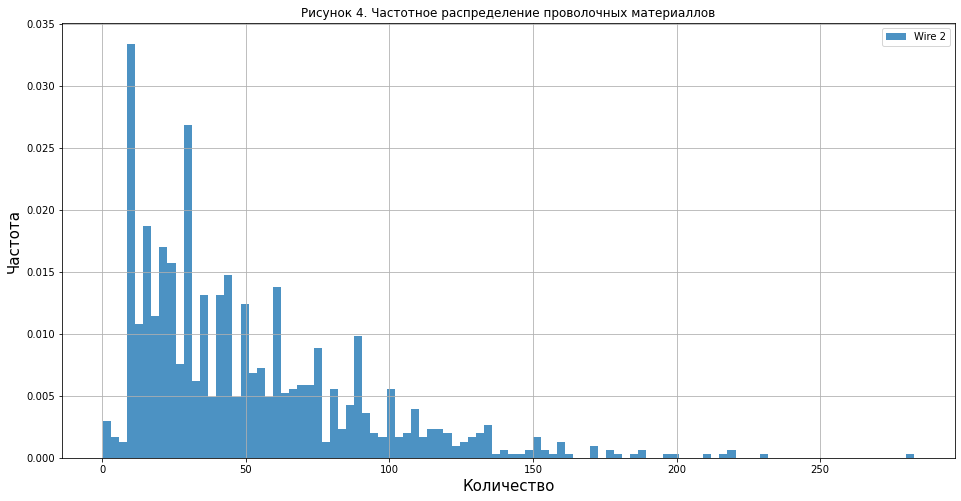

In [27]:
data_wire=df_wire[['Wire 1', 'Wire 2']] #выведем распределение только для проволочных материаллов
                                            #с количеством использования более 1000 
title_4='Рисунок 4. Частотное распределение проволочных материаллов'
for i in data_wire:
    graph_plot (data_wire[data_wire[i] > 0] [i], 100, title_4) 

***Промежуточный вывод:*** Для wire 1 распределение бликзо к нормальному, для wire 2 распределение отличается от нормального.

***Выведем частотное распределение данных о продувке газом***

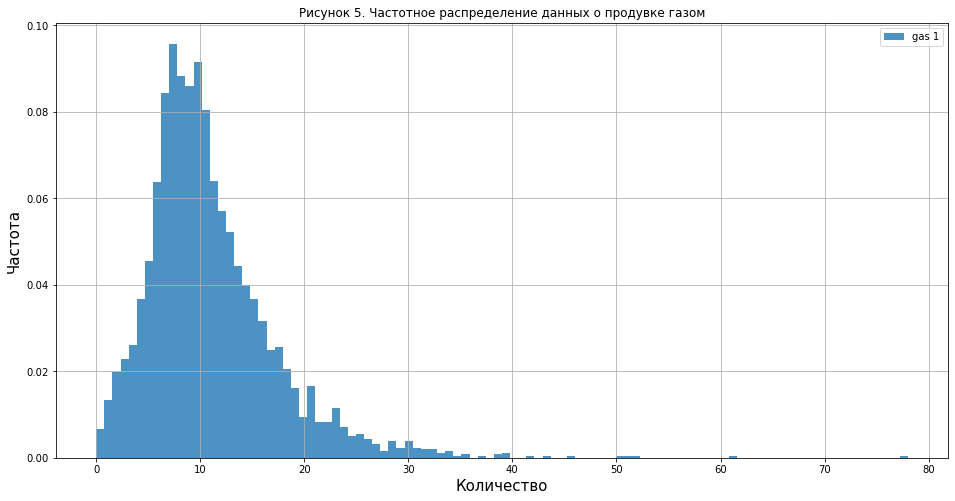

In [28]:
title_5='Рисунок 5. Частотное распределение данных о продувке газом'
graph_plot (df_gas[df_gas['gas 1'] > 0] ['gas 1'], 100, title_5)

***Промежуточный вывод:*** Распределение близко к нормальному с небольшим хвостом в правой части.

***Выведем частотное распределение данных о температуре***

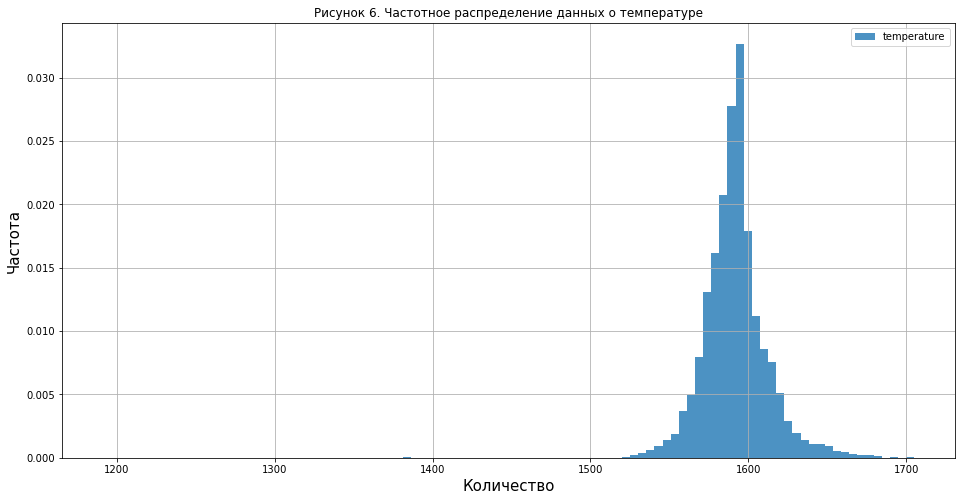

In [29]:
title_6='Рисунок 6. Частотное распределение данных о температуре'
graph_plot (df_temp[df_temp['temperature'] > 0] ['temperature'], 100, title_6)

***Промежуточный вывод:*** Распределение близко к нормальному, но значительно смещено вправо. Это связано с температурным
    диапозоном сталеплавильных процессов. Так температура плавления чистого железа равна 1539 градусов цельсия и снижается
    при добавлении легирующих материлов в пределах десятка градусов. Следовательно все наблюдения с температурой менее 1550    градусов можно удалить, так как при этих температурах расплав уже кристаллизуется.  

# <a id='part14'> 3.2 Поиск и очистка выбросов </a>
<a href='#table of contents'>к оглавлению</a>

***Удалим выбросы для данных о расходе электроэнергии*** 

Text(0, 0.5, 'Активная мощность')

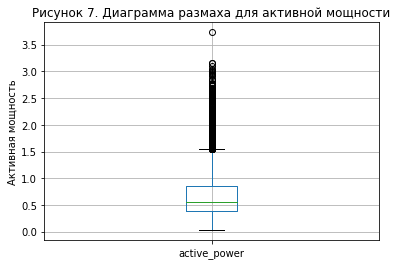

In [30]:
df_arc.boxplot('active_power')
plt.title('Рисунок 7. Диаграмма размаха для активной мощности')
plt.ylabel('Активная мощность')

Text(0, 0.5, 'Реактивная мощность')

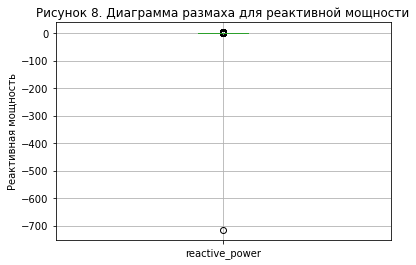

In [31]:
df_arc.boxplot('reactive_power')
plt.title('Рисунок 8. Диаграмма размаха для реактивной мощности')
plt.ylabel('Реактивная мощность')

Удалим выбросы по мощности

In [32]:
df_arc_clean=df_arc.query('active_power<1.6 and reactive_power>0')
df_arc_clean.describe()

,key,active_power,reactive_power
count,14373.000000,14373.000000,14373.000000
mean,1616.053155,0.624883,0.467236
std,933.895324,0.326692,0.252801
min,1.000000,0.030002,0.020806
25%,808.000000,0.389586,0.285455
50%,1614.000000,0.543093,0.405743
75%,2431.000000,0.818197,0.609030
max,3241.000000,1.598952,2.100782


***Удалим выбросы для данных о сыпучих материалах*** 

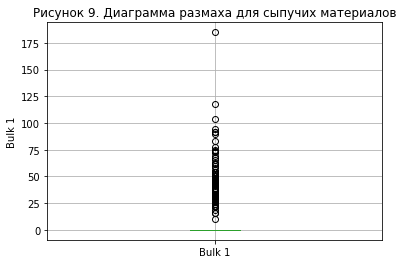

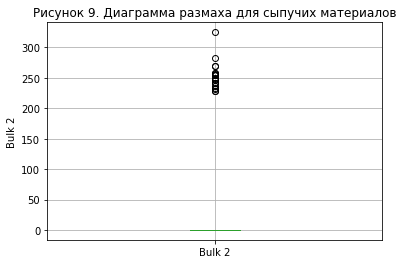

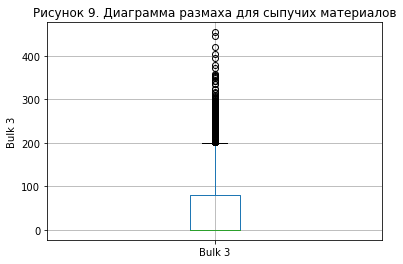

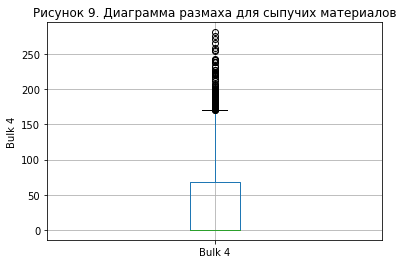

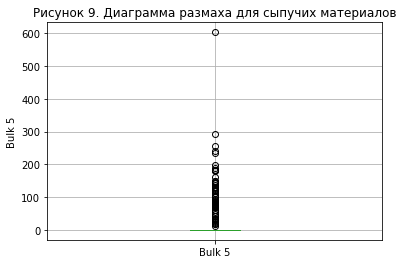

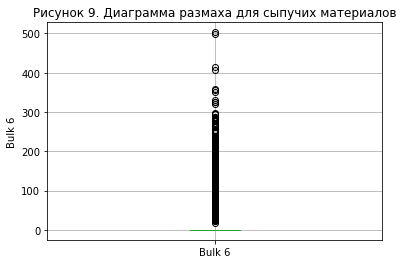

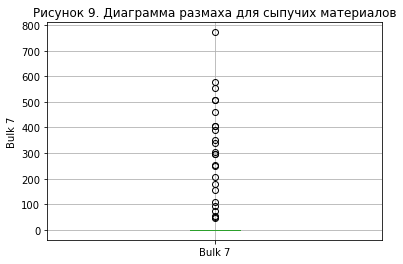

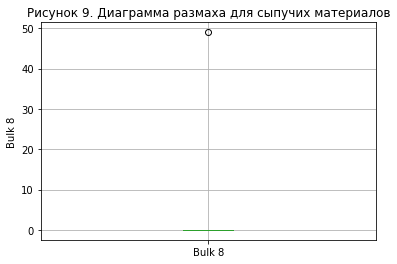

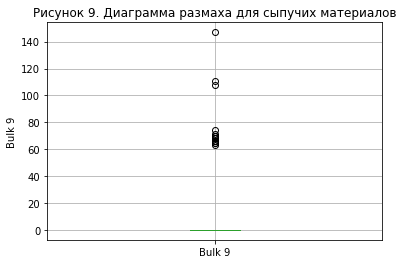

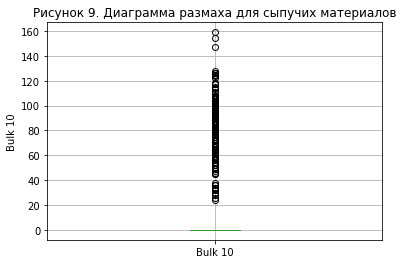

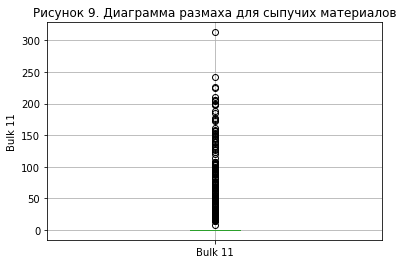

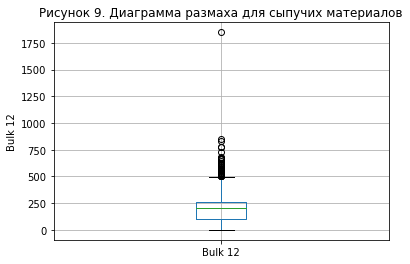

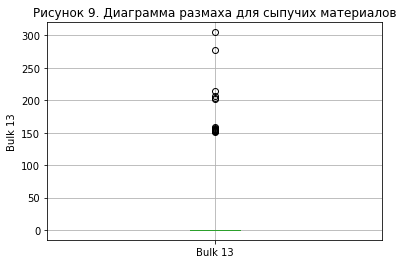

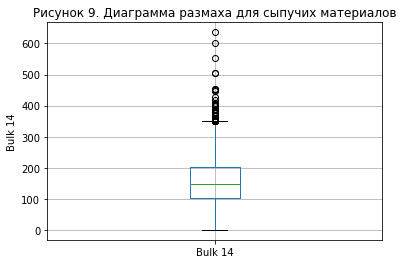

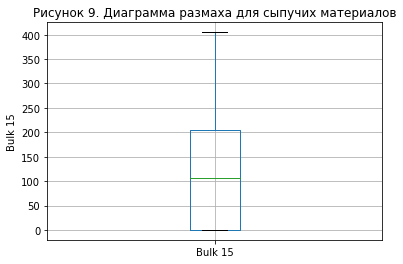

In [33]:
data_bulk=df_bulk[['Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6', 'Bulk 7', 'Bulk 8', 'Bulk 9',
                  'Bulk 10', 'Bulk 11', 'Bulk 12', 'Bulk 13', 'Bulk 14', 'Bulk 15']]
for i in data_bulk:
    plt.figure()
    plt.title('Рисунок 9. Диаграмма размаха для сыпучих материалов')
    plt.ylabel(i)
    data_bulk.boxplot(i)

In [34]:
print(df_bulk.columns)

Index(['key', 'Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6',
       'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 12',
       'Bulk 13', 'Bulk 14', 'Bulk 15'],
      dtype='object')


In [35]:
df_bulk_clean=df_bulk.query('`Bulk 3`<200 and `Bulk 4`<160 and `Bulk 6` <300 and `Bulk 12` <500 and `Bulk 14` <350')
df_bulk_clean.describe()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000,2705.000000
mean,1646.418115,2.307948,2.058041,35.918669,29.248429,2.625139,19.178928,2.674307,0.018115,0.469871,5.171534,4.279113,189.309057,0.919409,145.979667,113.012939
std,936.373916,9.511370,22.808275,53.954973,47.774522,18.922626,48.356798,33.454664,0.942133,6.129996,21.240160,22.293200,135.271210,13.017376,75.054398,84.752848
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,829.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,104.000000,0.000000,103.000000,0.000000
50%,1658.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,0.000000,143.000000,106.000000
75%,2456.000000,0.000000,0.000000,67.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,257.000000,0.000000,200.000000,204.000000
max,3241.000000,104.000000,325.000000,199.000000,159.000000,293.000000,297.000000,772.000000,49.000000,147.000000,159.000000,313.000000,496.000000,278.000000,349.000000,405.000000


***Удалим выбросы для данных о проволочных материалах*** 

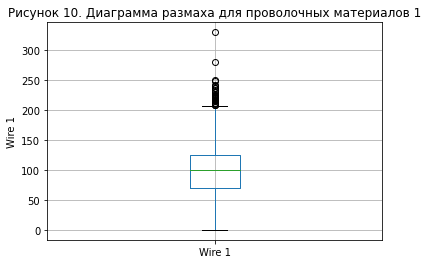

In [36]:
df_wire.boxplot('Wire 1')
plt.title('Рисунок 10. Диаграмма размаха для проволочных материалов 1')
plt.ylabel('Wire 1')
plt.show()

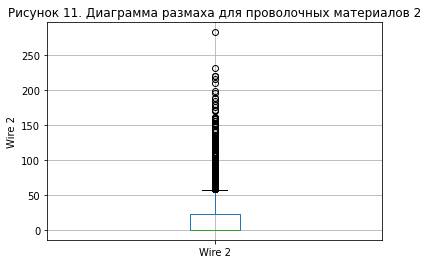

In [37]:
df_wire.boxplot('Wire 2')
plt.title('Рисунок 11. Диаграмма размаха для проволочных материалов 2')
plt.ylabel('Wire 2')
plt.show()

In [38]:
df_wire_clean=df_wire.query('`Wire 1`<200 and `Wire 2`<150')
df_wire_clean.describe()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000,3008.000000
mean,1627.420878,98.171941,16.125045,3.612043,0.267354,0.005031,1.165306,0.036712,0.338723,0.276751
std,938.160023,40.416363,29.387609,29.115205,4.345478,0.275904,9.064421,0.783511,4.445372,3.559032
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,818.750000,70.106405,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1630.500000,100.070877,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2443.250000,124.211884,21.232639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3241.000000,199.882806,148.930079,385.008668,113.231044,15.132000,180.454575,32.847674,102.762401,90.053604


***Удалим выбросы для данных о продувке сплава газом*** 

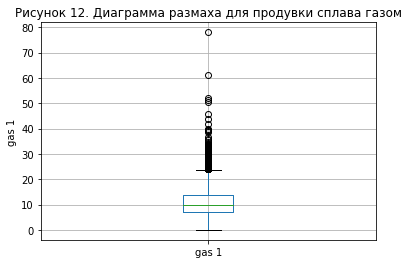

In [39]:
df_gas.boxplot('gas 1')
plt.title('Рисунок 12. Диаграмма размаха для продувки сплава газом')
plt.ylabel('gas 1')
plt.show()

In [40]:
df_gas_clean=df_gas.query('`gas 1`<25 ')
df_gas_clean.describe()

,key,gas 1
count,3138.000000,3138.000000
mean,1630.552263,10.342255
std,935.292409,4.897960
min,2.000000,0.008399
25%,827.250000,6.957736
50%,1631.500000,9.643678
75%,2437.750000,13.219771
max,3241.000000,24.989361


***Удалим выбросы для данных о температуре*** 

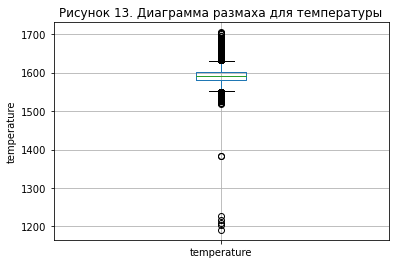

In [41]:
df_temp.boxplot('temperature')
plt.title('Рисунок 13. Диаграмма размаха для температуры')
plt.ylabel('temperature')
plt.show()

In [42]:
df_temp_clean=df_temp[df_temp['temperature'] >1550] 
df_temp_clean=df_temp_clean[df_temp_clean['temperature'] <1650] 
df_temp.info()
df_temp_clean.info()
df_temp_clean.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13004 entries, 0 to 13005
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   key             13004 non-null  int64         
 1   time_determine  13004 non-null  datetime64[ns]
 2   temperature     13004 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), int64(1)
memory usage: 419.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12571 entries, 0 to 13005
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   key             12571 non-null  int64         
 1   time_determine  12571 non-null  datetime64[ns]
 2   temperature     12571 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), int64(1)
memory usage: 405.1 KB


,key,temperature
count,12571.000000,12571.000000
mean,1324.802243,1591.925543
std,800.494483,16.753703
min,1.000000,1551.000000
25%,638.000000,1581.000000
50%,1308.000000,1591.000000
75%,1971.000000,1601.000000
max,3241.000000,1649.000000


***Создадим сводную таблицу по каждой партии для расхода электроэнергии***

In [43]:
display(df_arc_clean)

,key,start_heating,stop_heating,active_power,reactive_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.438063,0.283043
...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768


Логично что температура зависит не только от мощности нагрева, но и от его длительности, поэтому создадим столбец 
с длительностью нагрева

In [44]:
df_arc_clean['duration_heating']=df_arc_clean['stop_heating']-df_arc_clean['start_heating']
df_arc_clean['duration_heating']=df_arc_clean['duration_heating'].dt.total_seconds()
display(df_arc_clean)

<ipython-input-44-4ed5987fd65c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arc_clean['duration_heating']=df_arc_clean['stop_heating']-df_arc_clean['start_heating']
<ipython-input-44-4ed5987fd65c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arc_clean['duration_heating']=df_arc_clean['duration_heating'].dt.total_seconds()


,key,start_heating,stop_heating,active_power,reactive_power,duration_heating
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,228.0
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,185.0
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,172.0
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,148.0
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.438063,0.283043,137.0
...,...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439,157.0
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631,180.0
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654,184.0
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768,57.0


Из первых строк уже видно, что для каждой партии бывает несколько нагревов. Посчитаем уникальные партии

In [45]:
df_arc_clean['key'].nunique()

3214

Создадим сводную таблицу по партиям 

In [46]:
df_arc_sum=df_arc_clean.pivot_table(index=['key'], values=['active_power', 'reactive_power', 'duration_heating'], 
                                    aggfunc=['sum'])
display(df_arc_sum)

sum                                
     active_power duration_heating reactive_power
key                                              
1        3.218784            733.0       2.120572
2        3.052598            811.0       1.998112
3        2.525882            655.0       1.599076
4        3.209250            741.0       2.060298
5        1.725508            454.0       1.204867
...           ...              ...            ...
3237     3.932467            909.0       2.828459
3238     2.106529            546.0       1.681182
3239     4.666754           1216.0       3.111617
3240     2.984083            839.0       2.483267
3241     2.471447            659.0       1.696199

[3214 rows x 3 columns]

***Создадим сводную таблицу для каждой партии по сыпучим материалам***

Посчитаем уникальные партии

In [47]:
df_bulk_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2705 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      2705 non-null   int64  
 1   Bulk 1   2705 non-null   float64
 2   Bulk 2   2705 non-null   float64
 3   Bulk 3   2705 non-null   float64
 4   Bulk 4   2705 non-null   float64
 5   Bulk 5   2705 non-null   float64
 6   Bulk 6   2705 non-null   float64
 7   Bulk 7   2705 non-null   float64
 8   Bulk 8   2705 non-null   float64
 9   Bulk 9   2705 non-null   float64
 10  Bulk 10  2705 non-null   float64
 11  Bulk 11  2705 non-null   float64
 12  Bulk 12  2705 non-null   float64
 13  Bulk 13  2705 non-null   float64
 14  Bulk 14  2705 non-null   float64
 15  Bulk 15  2705 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 359.3 KB


In [48]:
df_bulk_clean['key'].nunique()

2705

Составлять сводную таблицу нет необходимости

***Создадим сводную таблицу для каждой партии по проволочным материалам***

Посчитаем уникальные партии

In [49]:
df_wire_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3008 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3008 non-null   int64  
 1   Wire 1  3008 non-null   float64
 2   Wire 2  3008 non-null   float64
 3   Wire 3  3008 non-null   float64
 4   Wire 4  3008 non-null   float64
 5   Wire 5  3008 non-null   float64
 6   Wire 6  3008 non-null   float64
 7   Wire 7  3008 non-null   float64
 8   Wire 8  3008 non-null   float64
 9   Wire 9  3008 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 258.5 KB


In [50]:
df_wire_clean['key'].nunique()

3008

Составлять сводную таблицу нет необходимости

***Создадим сводную таблицу для каждой партии по продувке сплава газом***

In [51]:
df_gas_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3138 entries, 1 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3138 non-null   int64  
 1   gas 1   3138 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 73.5 KB


In [52]:
df_gas_clean['key'].nunique()

3138

Составлять сводную таблицу нет необходимости

***Создадим сводную таблицу для каждой партии по замерам температуры***

In [53]:
df_temp_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12571 entries, 0 to 13005
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   key             12571 non-null  int64         
 1   time_determine  12571 non-null  datetime64[ns]
 2   temperature     12571 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), int64(1)
memory usage: 405.1 KB


In [54]:
df_temp_clean['key'].nunique()

3154

Вначале удалим партии в которых замер температуры производился до окончания нагрева дугой

In [55]:
key_drop=[]
for key in list(df_temp_clean['key'].unique()):
    if df_temp_clean[df_temp_clean['key']==key]['time_determine'].max() < df_arc_clean[df_arc_clean['key']==key]['stop_heating'].max():
        key_drop.append(key)
        
#выведем номера партий
print(key_drop)

[11, 38, 43, 51, 52, 53, 54, 55, 64, 69, 73, 82, 177, 179, 180, 182, 185, 210, 213, 216, 220, 222, 267, 271, 293, 296, 297, 321, 325, 326, 330, 331, 375, 444, 445, 448, 453, 456, 470, 471, 472, 491, 535, 562, 586, 587, 588, 590, 592, 593, 596, 616, 638, 641, 704, 731, 733, 741, 757, 786, 800, 869, 870, 874, 878, 928, 929, 930, 931, 932, 933, 934, 997, 1057, 1060, 1102, 1103, 1104, 1106, 1152, 1153, 1161, 1232, 1313, 1316, 1341, 1371, 1379, 1380, 1381, 1402, 1433, 1458, 1461, 1464, 1493, 1505, 1525, 1527, 1558, 1563, 1564, 1565, 1578, 1618, 1622, 1623, 1624, 1639, 1657, 1683, 1685, 1712, 1713, 1720, 1724, 1744, 1745, 1811, 1813, 1817, 1818, 1837, 1872, 1873, 1876, 1946, 1948, 1949, 1964, 1966, 1987, 1989, 1990, 1992, 1993, 1994, 2053, 2078, 2107, 2108, 2138, 2140, 2142, 2143, 2152, 2211, 2214, 2215, 2221, 2261, 2263, 2265, 2300, 2303, 2389, 2390, 2392, 2393, 2398, 2425, 2427, 2451, 2457, 2501, 2502, 2503, 2504, 2505, 2506, 2507, 2508, 2511, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2519

Проверим правильность подсчета 

In [56]:
for key in key_drop:
    display(df_temp_clean[df_temp_clean['key']==key]['time_determine'].max() < 
            df_arc_clean[df_arc_clean['key']==key]['stop_heating'].max())

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

True

Удалим строки с данными без конечной температуры

In [57]:
df_temp_clean_2=df_temp_clean.query('key not in @key_drop')
df_temp_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11257 entries, 0 to 12825
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   key             11257 non-null  int64         
 1   time_determine  11257 non-null  datetime64[ns]
 2   temperature     11257 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), int64(1)
memory usage: 362.8 KB


Удалим партии где замеров было меньше двух 

In [58]:
key_below_2=df_temp_clean_2['key'].value_counts()<2

print('Количество партий с замером температуры меньше 2', '-' ,' ', key_below_2.sum())

Количество партий с замером температуры меньше 2 -   11


Получим значения key этих партий 

In [59]:
key_below_2_DataFrame=key_below_2.to_frame()
key_below_2_values=key_below_2_DataFrame[key_below_2_DataFrame['key']==True].index
print('Значение key для наблюдений с замерами температуры меньше 2', key_below_2_values)

Значение key для наблюдений с замерами температуры меньше 2 Int64Index([3026, 2738, 1504, 2940, 713, 3059, 2863, 2792, 2841, 2795, 1746], dtype='int64')


Удалим эти партии

In [60]:
df_temp_clean_3=df_temp_clean_2.drop(df_temp_clean_2.index[key_below_2_values])
df_temp_clean_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11246 entries, 0 to 12825
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   key             11246 non-null  int64         
 1   time_determine  11246 non-null  datetime64[ns]
 2   temperature     11246 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), int64(1)
memory usage: 362.4 KB


Как видно из таблицы партии повторяются много раз, но в таблице содержится как начальная температура партии, так и конечная.
Создадим сводную таблицу с начальной и конечной температурой замера для каждой партии.

In [61]:
df_temp_first_last=df_temp_clean_3.pivot_table(index=['key'], values=['time_determine'], 
                                    aggfunc={'time_determine': [np.min, np.max]})
display(df_temp_first_last)

time_determine                    
                    amax                amin
key                                         
1    2019-05-03 11:30:39 2019-05-03 11:16:18
2    2019-05-03 11:59:12 2019-05-03 11:37:27
3    2019-05-03 12:34:57 2019-05-03 12:13:17
4    2019-05-03 12:59:25 2019-05-03 12:52:57
5    2019-05-03 13:36:01 2019-05-03 13:23:19
...                  ...                 ...
2841 2019-08-18 10:29:37 2019-08-18 10:29:37
2863 2019-08-19 08:03:55 2019-08-19 08:03:55
2940 2019-08-22 02:37:45 2019-08-22 02:37:45
3026 2019-08-25 03:55:00 2019-08-25 03:55:00
3059 2019-08-26 08:22:05 2019-08-26 08:22:05

[2311 rows x 2 columns]

Получим две таблицы с начальной и конечной температурами

In [62]:
#сохраним списки значений с временем замеров
temp_time_first=list(df_temp_first_last['time_determine', 'amin'])
temp_time_last=list(df_temp_first_last['time_determine', 'amax'])

#создадим срезы по этим данным
df_temp_first=df_temp_clean_3.query('time_determine in @temp_time_first ')

df_temp_last=df_temp_clean_3.query('time_determine in @temp_time_last ')


#получим финальную таблицу 
df_temp_first_temperature=df_temp_first.drop(['time_determine'], axis=1) 
display(df_temp_first_temperature)
df_temp_last_temperature=df_temp_last.drop(['time_determine'], axis=1) 
display(df_temp_last_temperature)
df_temp_final=df_temp_first_temperature.merge(df_temp_last_temperature, on='key', 
                                              suffixes=('_first', '_last'))
df_temp_final=df_temp_final.set_index('key')
display(df_temp_final)

,key,temperature
0,1,1571
5,2,1581
11,3,1596
16,4,1601
19,5,1576
...,...,...
12607,2841,1616
12629,2863,1582
12706,2940,1566
12792,3026,1623


,key,temperature
4,1,1613
10,2,1602
15,3,1599
18,4,1625
20,5,1602
...,...,...
12607,2841,1616
12629,2863,1582
12706,2940,1566
12792,3026,1623


,temperature_first,temperature_last
key,,
1,1571,1613
2,1581,1602
3,1596,1599
4,1601,1625
5,1576,1602
...,...,...
2841,1616,1616
2863,1582,1582
2940,1566,1566


Как видно в таблице присутствуют наблюдения, где значение первого и второго замера совпадают. Удалим такие наблюдения.

In [63]:
df_temp_final_equal=df_temp_final['temperature_first']==df_temp_final['temperature_last']
print('Количество наблюдений где первый и второй замеры температуры совпадают', '-', df_temp_final_equal.sum()) 

Количество наблюдений где первый и второй замеры температуры совпадают - 54


In [64]:
df_temp_final_equal_DataFrame=df_temp_final_equal.sort_values().to_frame()
df_temp_final_equal_DataFrame
df_temp_index=df_temp_final_equal_DataFrame.tail(51).index.to_list()
display(df_temp_index)
df_temp_final_2=df_temp_final.query('key not in @df_temp_index')
display(df_temp_final_2.info())

[3026,
 2792,
 2738,
 2940,
 1277,
 2795,
 1857,
 1184,
 816,
 2026,
 2019,
 489,
 1728,
 1746,
 1748,
 754,
 2048,
 748,
 1940,
 1785,
 714,
 713,
 573,
 623,
 632,
 648,
 1952,
 2049,
 2052,
 826,
 1301,
 1328,
 2371,
 1123,
 1389,
 1084,
 1411,
 2312,
 197,
 2294,
 2254,
 2246,
 262,
 998,
 991,
 1504,
 1523,
 1608,
 2060,
 63,
 3059]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260 entries, 1 to 2863
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   temperature_first  2260 non-null   Int64
 1   temperature_last   2260 non-null   Int64
dtypes: Int64(2)
memory usage: 57.4 KB


None

# <a id='part15'> 3.3 Поиск кореляции в данных </a>
<a href='#table of contents'>к оглавлению</a>

***Создадим объединенный датасет для дальнейшей работы***

Выведем инфрмацию о всех таблциах после предобработки

In [65]:
df_sum_all=[df_arc_sum, df_bulk_clean, df_wire_clean, df_gas_clean, df_temp_final_2] 
for i in df_sum_all:
    i.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 1 to 3241
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   (sum, active_power)      3214 non-null   float64
 1   (sum, duration_heating)  3214 non-null   float64
 2   (sum, reactive_power)    3214 non-null   float64
dtypes: float64(3)
memory usage: 100.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2705 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      2705 non-null   int64  
 1   Bulk 1   2705 non-null   float64
 2   Bulk 2   2705 non-null   float64
 3   Bulk 3   2705 non-null   float64
 4   Bulk 4   2705 non-null   float64
 5   Bulk 5   2705 non-null   float64
 6   Bulk 6   2705 non-null   float64
 7   Bulk 7   2705 non-null   float64
 8   Bulk 8   2705 non-null   float64
 9   Bulk 9   2705 non-null   float64
 10  Bulk 10  2705 

Обединим таблицы по столбцу key

In [66]:
#df_sum_all=[df_arc_sum, df_bulk_clean, df_wire_clean, df_gas_clean, df_temp_final_2] 
df_sum_f_1=df_temp_final_2.merge(df_arc_sum, on='key', how='left')
df_sum_f_1.info()
df_sum_f_2=df_sum_f_1.merge(df_wire_clean, on='key', how='left')
df_sum_f_2.info()
df_sum_f_3=df_sum_f_2.merge(df_gas_clean, on='key', how='left')
df_sum_f_3.info()
df_sum_final=df_sum_f_3.merge(df_bulk_clean, on='key', how='left')

display(df_sum_final) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260 entries, 1 to 2863
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   temperature_first        2260 non-null   Int64  
 1   temperature_last         2260 non-null   Int64  
 2   (sum, active_power)      2260 non-null   float64
 3   (sum, duration_heating)  2260 non-null   float64
 4   (sum, reactive_power)    2260 non-null   float64
dtypes: Int64(2), float64(3)
memory usage: 110.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260 entries, 0 to 2259
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   key                      2260 non-null   int64  
 1   temperature_first        2260 non-null   Int64  
 2   temperature_last         2260 non-null   Int64  
 3   (sum, active_power)      2260 non-null   float64
 4   (sum, duration_heating)  226

C:\Users\hjhkljhgfd\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,key,temperature_first,temperature_last,"(sum, active_power)","(sum, duration_heating)","(sum, reactive_power)",Wire 1,Wire 2,Wire 3,Wire 4,...,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,1571,1613,3.218784,733.0,2.120572,60.059998,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0
1,2,1581,1602,3.052598,811.0,1.998112,96.052315,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0
2,3,1596,1599,2.525882,655.0,1.599076,91.160157,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0
3,4,1601,1625,3.209250,741.0,2.060298,89.063515,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0
4,5,1576,1602,1.725508,454.0,1.204867,89.238236,9.11456,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2255,2497,1571,1589,2.212379,569.0,1.851269,94.086723,9.04800,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,230.0,0.0,124.0,226.0
2256,2498,1591,1594,3.408725,750.0,2.355428,118.110717,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,101.0,0.0,206.0,0.0,129.0,207.0
2257,2499,1569,1603,4.098431,883.0,2.777865,110.160958,50.00528,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,233.0,0.0,126.0,227.0
2258,2841,1616,1616,0.633749,185.0,0.444966,90.111841,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
print(df_sum_final.columns)

Index([                      'key',         'temperature_first',
                'temperature_last',     ('sum', 'active_power'),
       ('sum', 'duration_heating'),   ('sum', 'reactive_power'),
                          'Wire 1',                    'Wire 2',
                          'Wire 3',                    'Wire 4',
                          'Wire 5',                    'Wire 6',
                          'Wire 7',                    'Wire 8',
                          'Wire 9',                     'gas 1',
                          'Bulk 1',                    'Bulk 2',
                          'Bulk 3',                    'Bulk 4',
                          'Bulk 5',                    'Bulk 6',
                          'Bulk 7',                    'Bulk 8',
                          'Bulk 9',                   'Bulk 10',
                         'Bulk 11',                   'Bulk 12',
                         'Bulk 13',                   'Bulk 14',
                         

In [68]:
df_sum_final.rename(columns={('sum', 'duration_heating'):'sum_duration_heating', ('sum', 'active_power'):'sum_active_power',
                     ('sum', 'reactive_power'):'sum_reactive_power'}, inplace=True)

df_sum_final.columns

Index(['key', 'temperature_first', 'temperature_last', 'sum_active_power',
       'sum_duration_heating', 'sum_reactive_power', 'Wire 1', 'Wire 2',
       'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6', 'Wire 7', 'Wire 8', 'Wire 9',
       'gas 1', 'Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6',
       'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 12',
       'Bulk 13', 'Bulk 14', 'Bulk 15'],
      dtype='object')

***Проверим корреляцию между признаками***

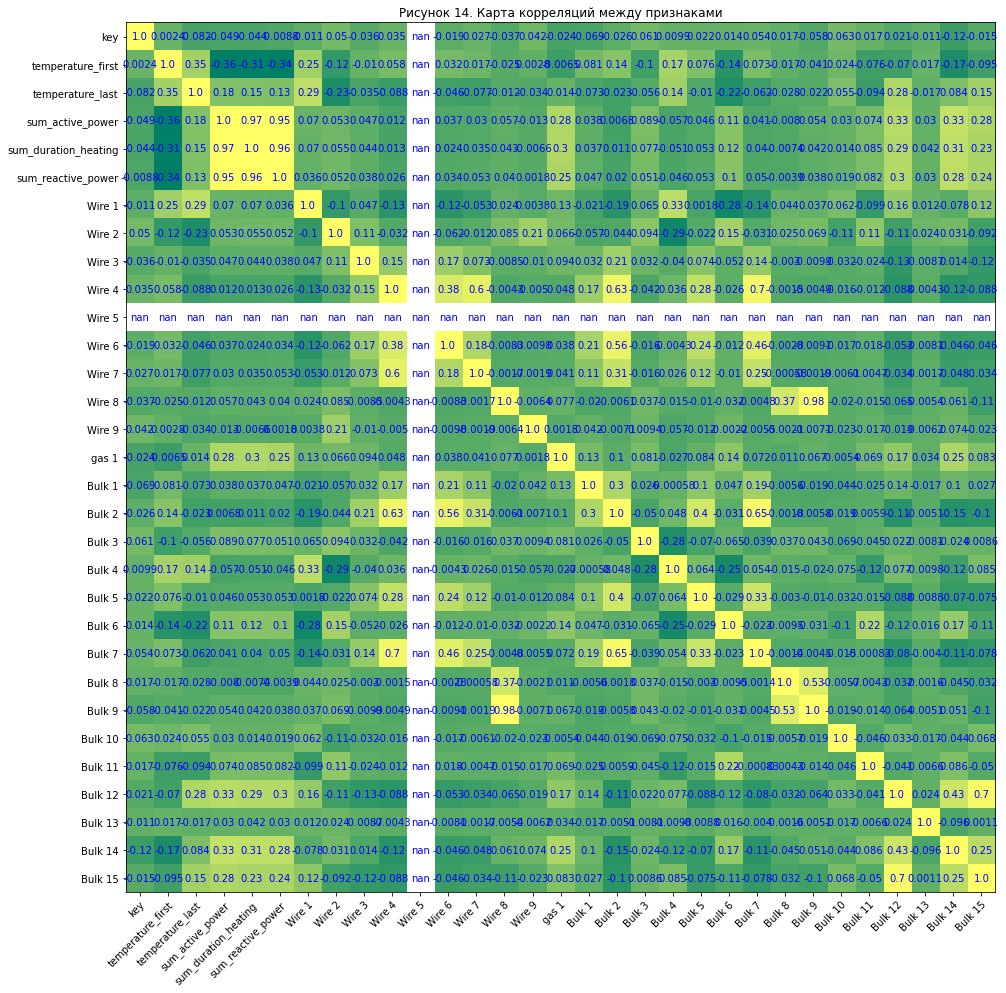

In [69]:
df_sum_final = df_sum_final.copy()
corr_heatmap_data = df_sum_final.corr()

fig, ax = plt.subplots(figsize=(16,16))
ax.set_xticks(np.arange(len(corr_heatmap_data.index)))
ax.set_yticks(np.arange(len(corr_heatmap_data.index)))

ax.set_xticklabels(corr_heatmap_data.index)
ax.set_yticklabels(corr_heatmap_data.index)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

data = corr_heatmap_data.values

for i in range(len(corr_heatmap_data.index)):
    for j in range(len(corr_heatmap_data.index)):
        text = ax.text(j, i, '{:.2}'.format(data[i, j]),
                       ha="center", va="center", color="b")
plt.title('Рисунок 14. Карта корреляций между признаками')      
im = ax.imshow(corr_heatmap_data.corr(), cmap='summer')

***Промежуточный вывод:*** Столбец wire 5 не содержит данных, 
    столбцы wire 8 и bulk 9 имеют сильную корреляцию.

# <a id='part16'> 3.4. Выбор данных для обучения. Создание объединенного датасета </a>
<a href='#table of contents'>к оглавлению</a>

Получим датасет для обучения

In [70]:
df_final=df_sum_final.drop(['key', 'sum_reactive_power', 'Wire 5', 'Bulk 9'], axis=1) #удалим лишние солбцы
df_final=df_final.fillna(0) #пропуски нулями
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260 entries, 0 to 2259
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temperature_first     2260 non-null   Int64  
 1   temperature_last      2260 non-null   Int64  
 2   sum_active_power      2260 non-null   float64
 3   sum_duration_heating  2260 non-null   float64
 4   Wire 1                2260 non-null   float64
 5   Wire 2                2260 non-null   float64
 6   Wire 3                2260 non-null   float64
 7   Wire 4                2260 non-null   float64
 8   Wire 6                2260 non-null   float64
 9   Wire 7                2260 non-null   float64
 10  Wire 8                2260 non-null   float64
 11  Wire 9                2260 non-null   float64
 12  gas 1                 2260 non-null   float64
 13  Bulk 1                2260 non-null   float64
 14  Bulk 2                2260 non-null   float64
 15  Bulk 3               

***Визуализируем конечный датасет***

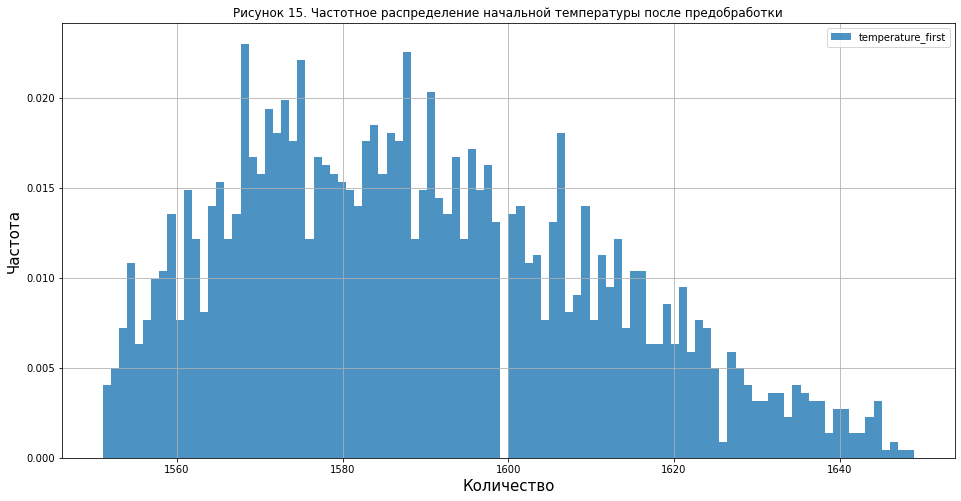

In [71]:
title15='Рисунок 15. Частотное распределение начальной температуры после предобработки'
graph_plot(df_final['temperature_first'], 100, title15)

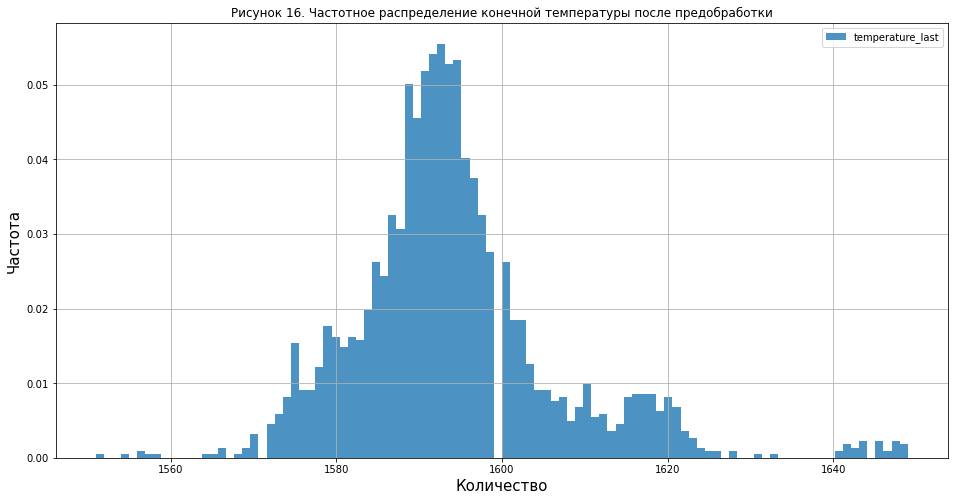

In [72]:
title16='Рисунок 16. Частотное распределение конечной температуры после предобработки'
graph_plot(df_final['temperature_last'], 100, title16)

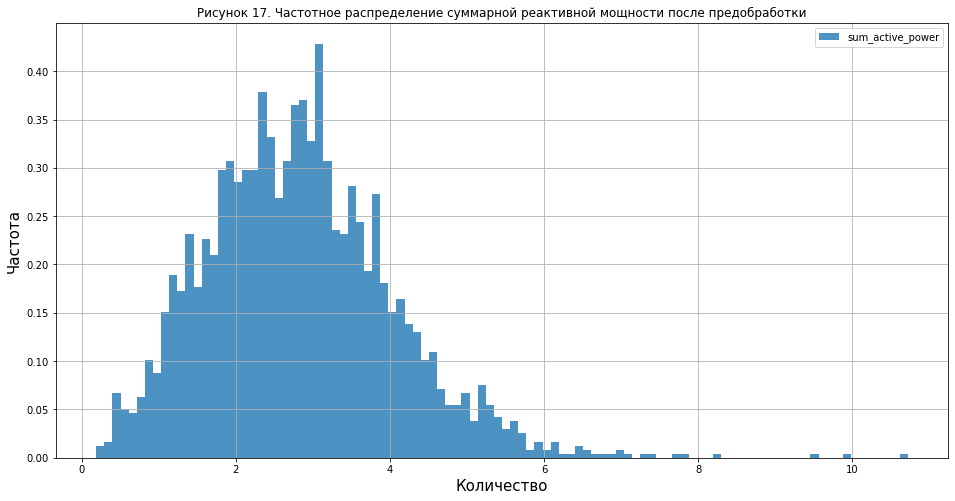

In [73]:
title17='Рисунок 17. Частотное распределение суммарной реактивной мощности после предобработки'
graph_plot(df_final['sum_active_power'], 100, title17)

Наблюдаем хвост справа для данных по мощности. Удалим эти данные. 

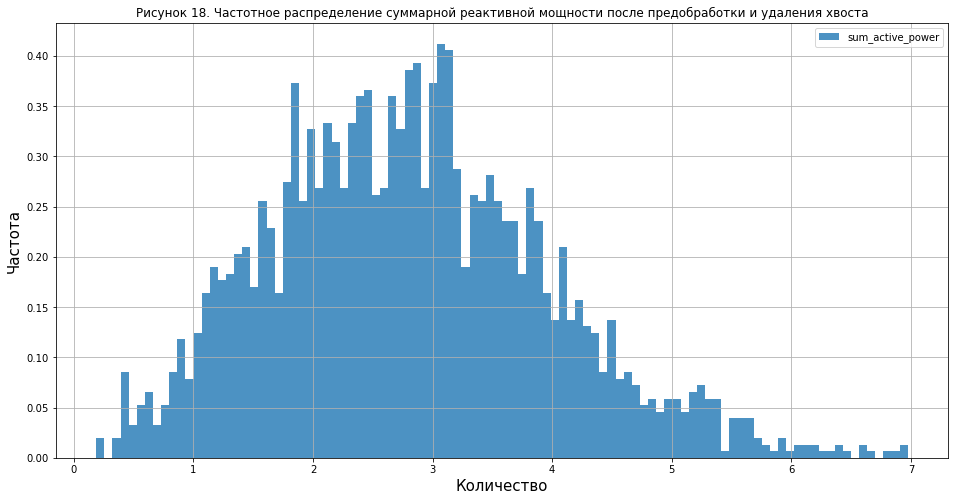

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2251 entries, 0 to 2259
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temperature_first     2251 non-null   Int64  
 1   temperature_last      2251 non-null   Int64  
 2   sum_active_power      2251 non-null   float64
 3   sum_duration_heating  2251 non-null   float64
 4   Wire 1                2251 non-null   float64
 5   Wire 2                2251 non-null   float64
 6   Wire 3                2251 non-null   float64
 7   Wire 4                2251 non-null   float64
 8   Wire 6                2251 non-null   float64
 9   Wire 7                2251 non-null   float64
 10  Wire 8                2251 non-null   float64
 11  Wire 9                2251 non-null   float64
 12  gas 1                 2251 non-null   float64
 13  Bulk 1                2251 non-null   float64
 14  Bulk 2                2251 non-null   float64
 15  Bulk 3               

count    2251.000000
mean        2.808027
std         1.164859
min         0.186226
25%         1.968649
50%         2.757768
75%         3.540140
max         6.973446
Name: sum_active_power, dtype: float64

In [74]:
df_final=df_final.query('sum_active_power<7')
title18='Рисунок 18. Частотное распределение суммарной реактивной мощности после предобработки и удаления хвоста'
graph_plot(df_final['sum_active_power'], 100, title18)
df_final.info()
df_final['sum_active_power'].describe()

Много данных не потеряли, а дисперсия по самому значимому признаку значительно уменьшилась

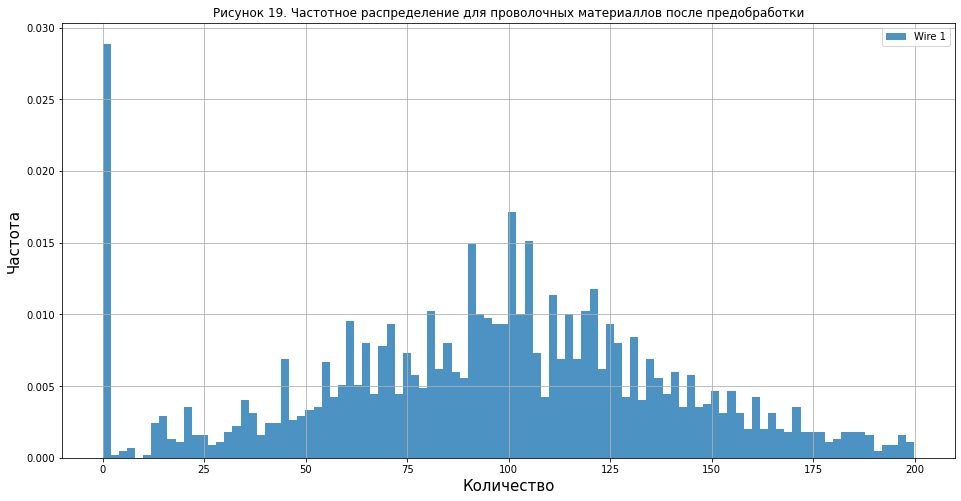

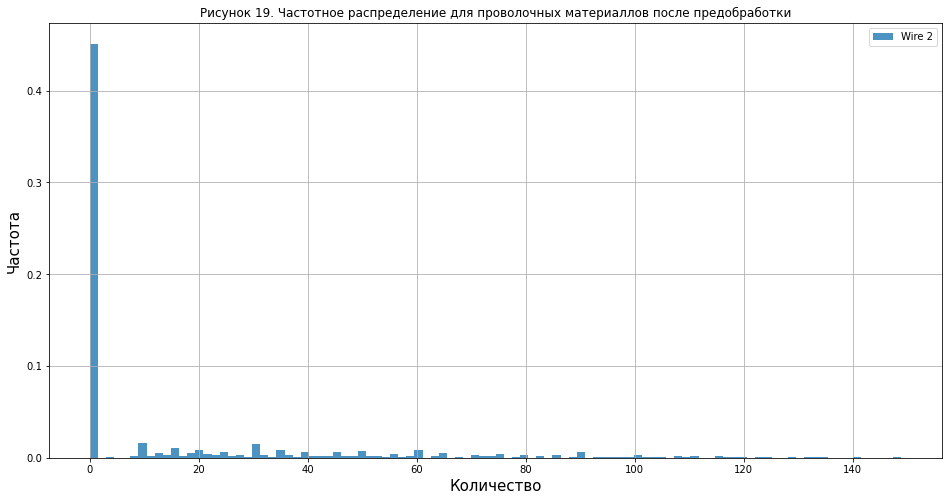

In [75]:
title19='Рисунок 19. Частотное распределение для проволочных материаллов после предобработки'
data_wire=df_final[['Wire 1', 'Wire 2']]
for i in data_wire:
        graph_plot(data_wire[i], 100, title19)

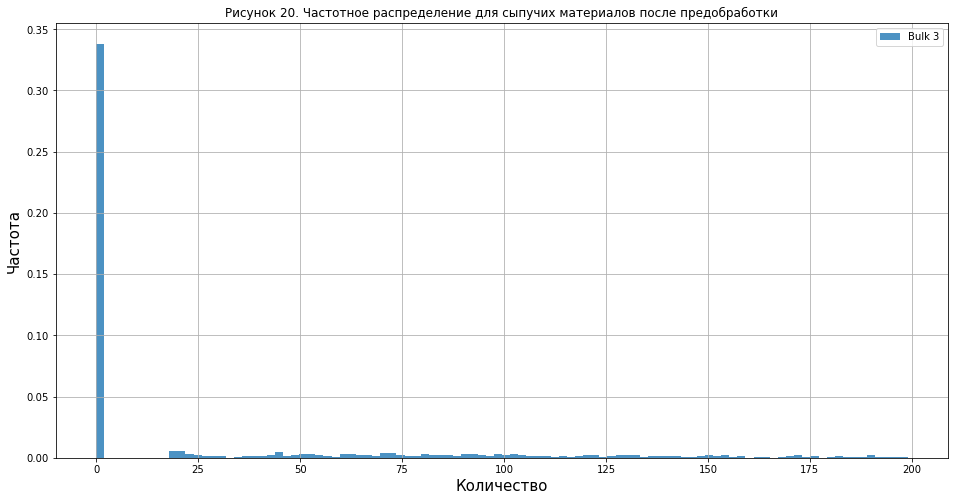

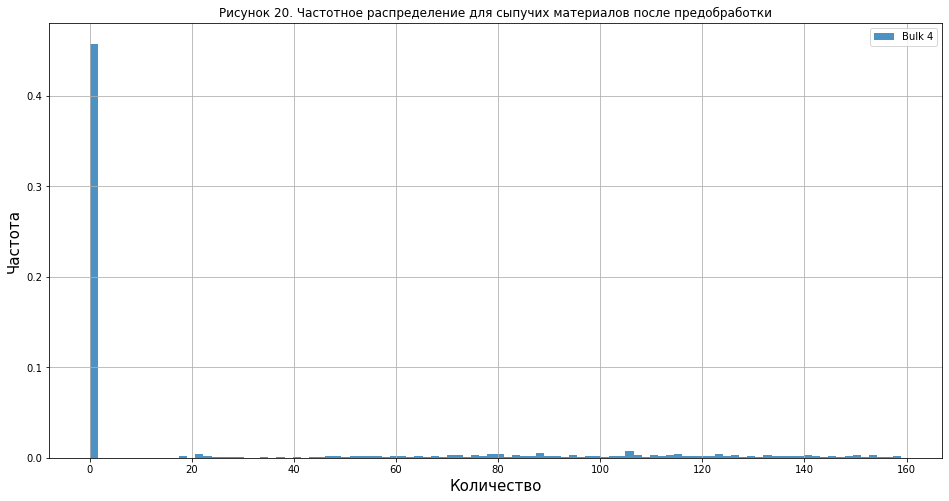

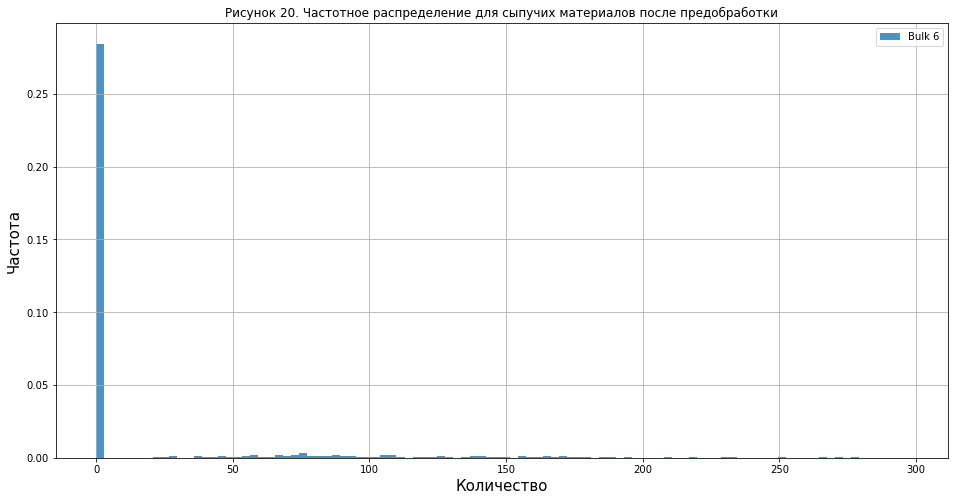

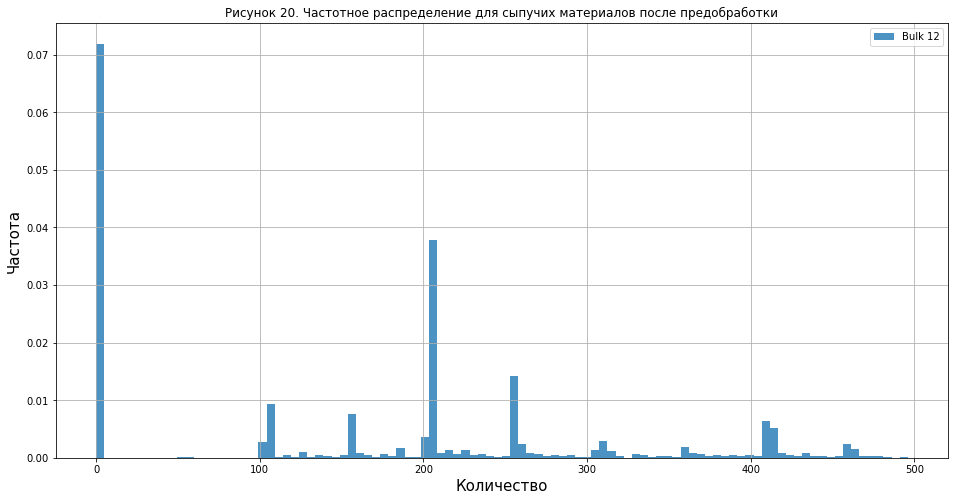

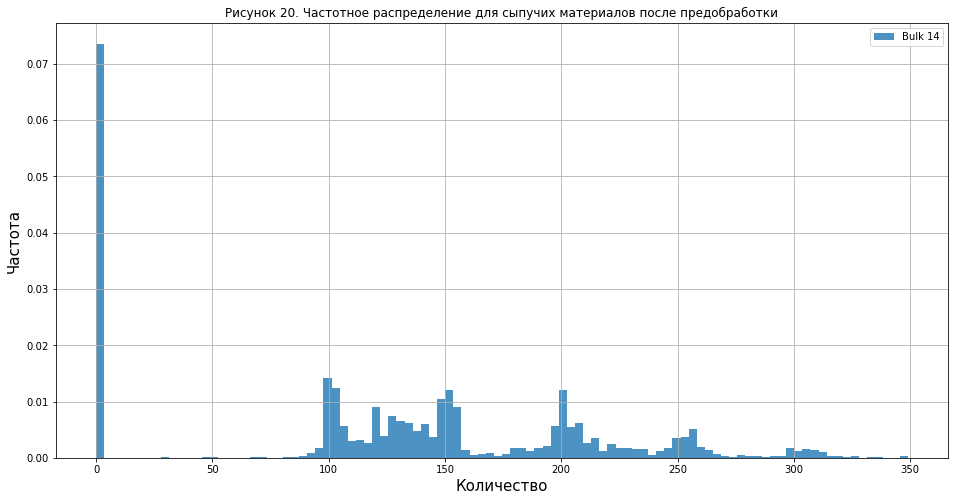

In [76]:
title20='Рисунок 20. Частотное распределение для сыпучих материалов после предобработки'
data_bulk=df_final[['Bulk 3', 'Bulk 4', 'Bulk 6', 'Bulk 12', 'Bulk 14']]
for i in data_bulk:
        graph_plot(data_bulk[i], 100, title20)

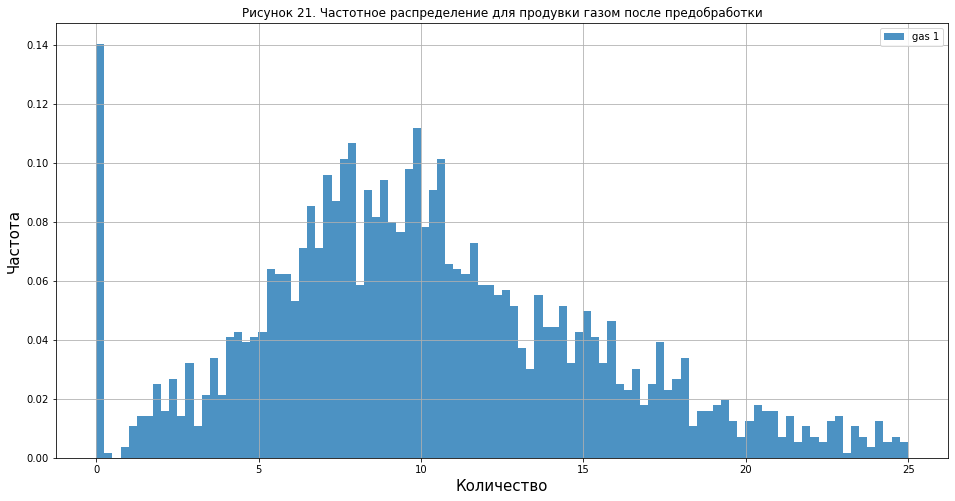

In [77]:
title21='Рисунок 21. Частотное распределение для продувки газом после предобработки'
graph_plot(df_final['gas 1'], 100, title21)

In [78]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2251 entries, 0 to 2259
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temperature_first     2251 non-null   Int64  
 1   temperature_last      2251 non-null   Int64  
 2   sum_active_power      2251 non-null   float64
 3   sum_duration_heating  2251 non-null   float64
 4   Wire 1                2251 non-null   float64
 5   Wire 2                2251 non-null   float64
 6   Wire 3                2251 non-null   float64
 7   Wire 4                2251 non-null   float64
 8   Wire 6                2251 non-null   float64
 9   Wire 7                2251 non-null   float64
 10  Wire 8                2251 non-null   float64
 11  Wire 9                2251 non-null   float64
 12  gas 1                 2251 non-null   float64
 13  Bulk 1                2251 non-null   float64
 14  Bulk 2                2251 non-null   float64
 15  Bulk 3               

# <a id='part17'> 3.5. Вывод 3 </a>
<a href='#table of contents'>к оглавлению</a>

 - Предобработка данных и проверка признаков на корреялцию позволила собрать датасет из 2251 наблюдений, что значительно меньше исходных данных и составляет всего ***17%*** от размера датасета по температуре. 
 - Целевым признаком является конечная температура ***temperature_last***, а остальные признаки необходимо использовать для обучения
 - Проверка кореляции между признаками показала, что наибольшее влияние на конечную температуру оказывает начальная температура, продолжительность нагрева и активная мощность, что вполне разумно. 
 - Расход легирующих, как проволочных, так и сыпучих оказывает небольшое влияние на конечную температуру. Это также выглядит логичным, так как количество присадок невелико по сравнению с массой стали и они не могут оказыать значительного влияния на температуру расплава. Подавамое дутье, также не оказывает значимого влияния, что связано с его невысоким расходом по сравгнению с массой стали и дополнительным подогревом перед продувкой.
 - Для корректной работы модели признаки необходимо масштабировать, так как существует значительный разброс по величине их значений.

# <a id='part18'>4. ОБУЧЕНИЕ МОДЕЛЕЙ</a>
<a href='#table of contents'>к оглавлению</a>

# <a href='#part19'> 4.1. Подготовка данных к обучению</a>   

Получим обучающие признаки и целевой признак

In [79]:
r=42

In [80]:
features=df_final.drop(['temperature_last'], axis=1) # определим признаки
target=df_final[['temperature_last']] # определим целевой признак
display(features)

,temperature_first,sum_active_power,sum_duration_heating,Wire 1,Wire 2,Wire 3,Wire 4,Wire 6,Wire 7,Wire 8,...,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1571,3.218784,733.0,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0
1,1581,3.052598,811.0,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0
2,1596,2.525882,655.0,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0
3,1601,3.209250,741.0,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0
4,1576,1.725508,454.0,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2255,1571,2.212379,569.0,94.086723,9.04800,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,230.0,0.0,124.0,226.0
2256,1591,3.408725,750.0,118.110717,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,101.0,0.0,206.0,0.0,129.0,207.0
2257,1569,4.098431,883.0,110.160958,50.00528,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,233.0,0.0,126.0,227.0
2258,1616,0.633749,185.0,90.111841,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Масштабируем признаки

In [81]:
scaler = StandardScaler()
df_column = ['temperature_first', 'sum_active_power', 'sum_duration_heating', 'Wire 1',
       'Wire 2', 'Wire 3', 'Wire 4',
       'Wire 6', 'Wire 7', 'Wire 8', 'Wire 9', 'gas 1', 'Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6', 'Bulk 7', 
             'Bulk 8', 'Bulk 10', 'Bulk 11', 'Bulk 12', 'Bulk 13', 'Bulk 14', 'Bulk 15'] 

scaler.fit(features[df_column])
features[df_column]= scaler.transform(features[df_column])
display(features)

,temperature_first,sum_active_power,sum_duration_heating,Wire 1,Wire 2,Wire 3,Wire 4,Wire 6,Wire 7,Wire 8,...,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,-0.839256,0.352702,0.043081,-0.774764,-0.534620,-0.113452,-0.056448,-0.11076,-0.022039,-0.068996,...,-0.119899,-0.37078,-0.05433,-0.021082,-0.225675,-0.169446,0.317599,-0.061715,0.280604,0.634364
1,-0.377921,0.210004,0.317115,0.028458,-0.534620,-0.113452,-0.056448,-0.11076,-0.022039,-0.068996,...,-0.119899,-0.37078,-0.05433,-0.021082,-0.225675,-0.169446,0.317599,-0.061715,0.269331,0.634364
2,0.314081,-0.242268,-0.230952,-0.080717,-0.534620,-0.113452,-0.056448,-0.11076,-0.022039,-0.068996,...,-0.119899,-0.37078,-0.05433,-0.021082,-0.225675,-0.169446,0.310636,-0.061715,0.303149,0.623116
3,0.544748,0.344516,0.071187,-0.127507,-0.534620,-0.113452,-0.056448,-0.11076,-0.022039,-0.068996,...,-0.119899,-0.37078,-0.05433,-0.021082,-0.225675,-0.169446,0.324562,-0.061715,0.314422,0.634364
4,-0.608589,-0.929520,-0.937114,-0.123608,-0.221635,-0.113452,-0.056448,-0.11076,-0.022039,-0.068996,...,-0.119899,-0.37078,-0.05433,-0.021082,-0.225675,-0.169446,0.296709,-0.061715,0.291876,0.611867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2255,-0.839256,-0.511461,-0.533091,-0.015407,-0.223920,-0.113452,-0.056448,-0.11076,-0.022039,-0.068996,...,-0.119899,-0.37078,-0.05433,-0.021082,-0.225675,-0.169446,0.484713,-0.061715,-0.012485,1.444251
2256,0.083413,0.515798,0.102807,0.520725,-0.534620,-0.113452,-0.056448,-0.11076,-0.022039,-0.068996,...,-0.119899,-0.37078,-0.05433,-0.021082,4.866873,-0.169446,0.317599,-0.061715,0.043879,1.230531
2257,-0.931523,1.108023,0.570068,0.343314,1.182513,-0.113452,-0.056448,-0.11076,-0.022039,-0.068996,...,-0.119899,-0.37078,-0.05433,-0.021082,-0.225675,-0.169446,0.505602,-0.061715,0.010061,1.455499
2258,1.236750,-1.866975,-1.882177,-0.104112,-0.534620,-0.113452,-0.056448,-0.11076,-0.022039,-0.068996,...,-0.119899,-0.37078,-0.05433,-0.021082,-0.225675,-0.169446,-1.116798,-0.061715,-1.410290,-1.097893


Получим обучающую и тестовую выборки после масштабирования

In [82]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=.25, random_state=r)
print('Размеры признаков')
display(features_train.shape)
display(features_test.shape)

Размеры признаков


(1688, 26)

(563, 26)

Создадим функцию для обучения моделей через кросс валидацию

In [83]:
def learning_model (features_train, target_train, features_test, target_test, model):
    final_score_train=cross_val_score(model, features_train, target_train, scoring='neg_mean_absolute_error', cv=5)
    final_score_test=cross_val_score(model, features_test, target_test, scoring='neg_mean_absolute_error', cv=5)
    print("Среднее MAE на тренировочных данных:", final_score_train.mean()*(-1))
    print("Среднее MAE на тестовых данных:", final_score_test.mean()*(-1))
    return final_score_train.mean()*(-1), final_score_test.mean()*(-1)

# <a id='part20'> 4.2 Обучим модель линейной регрессии </a>
<a href='#table of contents'>к оглавлению</a>

In [84]:
%%time
model = LinearRegression()
MAE_LinReg_train=learning_model(features_train, target_train, features_test, target_test, model)

Среднее MAE на тренировочных данных: 8.294818729488728
Среднее MAE на тестовых данных: 7.15578299462039
Wall time: 188 ms


# <a id='part21'> 4.3 Обучим модель дерева решений </a>
<a href='#table of contents'>к оглавлению</a>

Создадим функцию для обучения моделей через GridSearchCV

In [85]:
def learning_model_Grid (features_train, target_train, features_test, target_test, model):
    grid=GridSearchCV(model, parametrs, scoring='neg_mean_absolute_error', cv=5, verbose=3)
    model_fit=grid.fit(features_train, target_train.values.ravel())
    print("Лучшее MAE на тренировочных данных:", grid.best_score_*(-1))
    print("Лучшие параметры на тренировочных данных:", grid.best_params_)
    return model_fit

In [86]:
#создадим словарь с перебираемыми параметрами
parametrs = { 'max_depth': range (1,3),
              'min_samples_leaf': range (2,50,2),
              'min_samples_split': range (2,50,2)}

In [87]:
%%time

model = DecisionTreeRegressor(random_state=r) 
learning_model_Grid(features_train, target_train, features_test, target_test, model)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=2, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=2, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=2, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=2, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=2, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=4 ............
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=4, score=-8.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=8, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=8 ............
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=8, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=10 ...........
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=10, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=10 ...........
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=10, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=10 ...........
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=10, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=10 ...........
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=10, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=10 ...........
[CV]  max_depth=1, min_samples_leaf=2, min

[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=30, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=30 ...........
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=30, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=30 ...........
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=30, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=30 ...........
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=30, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=32 ...........
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=32, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=32 ...........
[CV]  max_depth=1, min_samples_leaf=2, min_samples_split=32, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=2, min_samples_split=32 ...........
[CV]  max_depth=1, min_samples_leaf=2, m

[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=2, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=4 ............
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=4, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=4 ............
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=4, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=4 ............
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=4, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=4 ............
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=4, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=4 ............
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=4, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=6 ............
[CV]  max_depth=1, min_samples_leaf=4, min_sam

[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=24, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=26 ...........
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=26, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=26 ...........
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=26, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=26 ...........
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=26, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=26 ...........
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=26, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=26 ...........
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=26, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=28 ...........
[CV]  max_depth=1, min_samples_leaf=4, m

[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=46, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=48 ...........
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=48, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=48 ...........
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=48, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=48 ...........
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=48, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=48 ...........
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=48, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=4, min_samples_split=48 ...........
[CV]  max_depth=1, min_samples_leaf=4, min_samples_split=48, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=6, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=6, m

[CV]  max_depth=1, min_samples_leaf=6, min_samples_split=20, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=6, min_samples_split=20 ...........
[CV]  max_depth=1, min_samples_leaf=6, min_samples_split=20, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=6, min_samples_split=20 ...........
[CV]  max_depth=1, min_samples_leaf=6, min_samples_split=20, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=6, min_samples_split=22 ...........
[CV]  max_depth=1, min_samples_leaf=6, min_samples_split=22, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=6, min_samples_split=22 ...........
[CV]  max_depth=1, min_samples_leaf=6, min_samples_split=22, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=6, min_samples_split=22 ...........
[CV]  max_depth=1, min_samples_leaf=6, min_samples_split=22, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=6, min_samples_split=22 ...........
[CV]  max_depth=1, min_samples_leaf=6, m

[CV]  max_depth=1, min_samples_leaf=6, min_samples_split=44, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=6, min_samples_split=44 ...........
[CV]  max_depth=1, min_samples_leaf=6, min_samples_split=44, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=6, min_samples_split=44 ...........
[CV]  max_depth=1, min_samples_leaf=6, min_samples_split=44, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=6, min_samples_split=44 ...........
[CV]  max_depth=1, min_samples_leaf=6, min_samples_split=44, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=6, min_samples_split=44 ...........
[CV]  max_depth=1, min_samples_leaf=6, min_samples_split=44, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=6, min_samples_split=46 ...........
[CV]  max_depth=1, min_samples_leaf=6, min_samples_split=46, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=6, min_samples_split=46 ...........
[CV]  max_depth=1, min_samples_leaf=6, m

[CV]  max_depth=1, min_samples_leaf=8, min_samples_split=18, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=8, min_samples_split=18 ...........
[CV]  max_depth=1, min_samples_leaf=8, min_samples_split=18, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=8, min_samples_split=18 ...........
[CV]  max_depth=1, min_samples_leaf=8, min_samples_split=18, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=8, min_samples_split=20 ...........
[CV]  max_depth=1, min_samples_leaf=8, min_samples_split=20, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=8, min_samples_split=20 ...........
[CV]  max_depth=1, min_samples_leaf=8, min_samples_split=20, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=8, min_samples_split=20 ...........
[CV]  max_depth=1, min_samples_leaf=8, min_samples_split=20, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=8, min_samples_split=20 ...........
[CV]  max_depth=1, min_samples_leaf=8, m

[CV]  max_depth=1, min_samples_leaf=8, min_samples_split=42, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=8, min_samples_split=42 ...........
[CV]  max_depth=1, min_samples_leaf=8, min_samples_split=42, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=8, min_samples_split=42 ...........
[CV]  max_depth=1, min_samples_leaf=8, min_samples_split=42, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=8, min_samples_split=44 ...........
[CV]  max_depth=1, min_samples_leaf=8, min_samples_split=44, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=8, min_samples_split=44 ...........
[CV]  max_depth=1, min_samples_leaf=8, min_samples_split=44, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=8, min_samples_split=44 ...........
[CV]  max_depth=1, min_samples_leaf=8, min_samples_split=44, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=8, min_samples_split=44 ...........
[CV]  max_depth=1, min_samples_leaf=8, m

[CV]  max_depth=1, min_samples_leaf=10, min_samples_split=16, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=10, min_samples_split=16 ..........
[CV]  max_depth=1, min_samples_leaf=10, min_samples_split=16, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=10, min_samples_split=16 ..........
[CV]  max_depth=1, min_samples_leaf=10, min_samples_split=16, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=10, min_samples_split=18 ..........
[CV]  max_depth=1, min_samples_leaf=10, min_samples_split=18, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=10, min_samples_split=18 ..........
[CV]  max_depth=1, min_samples_leaf=10, min_samples_split=18, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=10, min_samples_split=18 ..........
[CV]  max_depth=1, min_samples_leaf=10, min_samples_split=18, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=10, min_samples_split=18 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=10, min_samples_split=36, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=10, min_samples_split=36 ..........
[CV]  max_depth=1, min_samples_leaf=10, min_samples_split=36, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=10, min_samples_split=38 ..........
[CV]  max_depth=1, min_samples_leaf=10, min_samples_split=38, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=10, min_samples_split=38 ..........
[CV]  max_depth=1, min_samples_leaf=10, min_samples_split=38, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=10, min_samples_split=38 ..........
[CV]  max_depth=1, min_samples_leaf=10, min_samples_split=38, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=10, min_samples_split=38 ..........
[CV]  max_depth=1, min_samples_leaf=10, min_samples_split=38, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=10, min_samples_split=38 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=12, min_samples_split=10, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=12, min_samples_split=10 ..........
[CV]  max_depth=1, min_samples_leaf=12, min_samples_split=10, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=12, min_samples_split=10 ..........
[CV]  max_depth=1, min_samples_leaf=12, min_samples_split=10, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=12, min_samples_split=10 ..........
[CV]  max_depth=1, min_samples_leaf=12, min_samples_split=10, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=12, min_samples_split=10 ..........
[CV]  max_depth=1, min_samples_leaf=12, min_samples_split=10, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=12, min_samples_split=12 ..........
[CV]  max_depth=1, min_samples_leaf=12, min_samples_split=12, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=12, min_samples_split=12 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=12, min_samples_split=34, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=12, min_samples_split=34 ..........
[CV]  max_depth=1, min_samples_leaf=12, min_samples_split=34, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=12, min_samples_split=34 ..........
[CV]  max_depth=1, min_samples_leaf=12, min_samples_split=34, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=12, min_samples_split=34 ..........
[CV]  max_depth=1, min_samples_leaf=12, min_samples_split=34, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=12, min_samples_split=34 ..........
[CV]  max_depth=1, min_samples_leaf=12, min_samples_split=34, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=12, min_samples_split=36 ..........
[CV]  max_depth=1, min_samples_leaf=12, min_samples_split=36, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=12, min_samples_split=36 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=14, min_samples_split=8, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=14, min_samples_split=8 ...........
[CV]  max_depth=1, min_samples_leaf=14, min_samples_split=8, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=14, min_samples_split=8 ...........
[CV]  max_depth=1, min_samples_leaf=14, min_samples_split=8, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=14, min_samples_split=8 ...........
[CV]  max_depth=1, min_samples_leaf=14, min_samples_split=8, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=14, min_samples_split=10 ..........
[CV]  max_depth=1, min_samples_leaf=14, min_samples_split=10, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=14, min_samples_split=10 ..........
[CV]  max_depth=1, min_samples_leaf=14, min_samples_split=10, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=14, min_samples_split=10 ..........
[CV]  max_depth=1, min_samples_leaf=14

[CV]  max_depth=1, min_samples_leaf=14, min_samples_split=30, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=14, min_samples_split=30 ..........
[CV]  max_depth=1, min_samples_leaf=14, min_samples_split=30, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=14, min_samples_split=30 ..........
[CV]  max_depth=1, min_samples_leaf=14, min_samples_split=30, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=14, min_samples_split=30 ..........
[CV]  max_depth=1, min_samples_leaf=14, min_samples_split=30, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=14, min_samples_split=30 ..........
[CV]  max_depth=1, min_samples_leaf=14, min_samples_split=30, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=14, min_samples_split=32 ..........
[CV]  max_depth=1, min_samples_leaf=14, min_samples_split=32, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=14, min_samples_split=32 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=16, min_samples_split=4, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=16, min_samples_split=4 ...........
[CV]  max_depth=1, min_samples_leaf=16, min_samples_split=4, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=16, min_samples_split=4 ...........
[CV]  max_depth=1, min_samples_leaf=16, min_samples_split=4, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=16, min_samples_split=6 ...........
[CV]  max_depth=1, min_samples_leaf=16, min_samples_split=6, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=16, min_samples_split=6 ...........
[CV]  max_depth=1, min_samples_leaf=16, min_samples_split=6, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=16, min_samples_split=6 ...........
[CV]  max_depth=1, min_samples_leaf=16, min_samples_split=6, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=16, min_samples_split=6 ...........
[CV]  max_depth=1, min_samples_leaf=16, 

[CV]  max_depth=1, min_samples_leaf=16, min_samples_split=26, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=16, min_samples_split=28 ..........
[CV]  max_depth=1, min_samples_leaf=16, min_samples_split=28, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=16, min_samples_split=28 ..........
[CV]  max_depth=1, min_samples_leaf=16, min_samples_split=28, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=16, min_samples_split=28 ..........
[CV]  max_depth=1, min_samples_leaf=16, min_samples_split=28, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=16, min_samples_split=28 ..........
[CV]  max_depth=1, min_samples_leaf=16, min_samples_split=28, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=16, min_samples_split=28 ..........
[CV]  max_depth=1, min_samples_leaf=16, min_samples_split=28, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=16, min_samples_split=30 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=18, min_samples_split=2, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=18, min_samples_split=2 ...........
[CV]  max_depth=1, min_samples_leaf=18, min_samples_split=2, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=18, min_samples_split=2 ...........
[CV]  max_depth=1, min_samples_leaf=18, min_samples_split=2, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=18, min_samples_split=2 ...........
[CV]  max_depth=1, min_samples_leaf=18, min_samples_split=2, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=18, min_samples_split=4 ...........
[CV]  max_depth=1, min_samples_leaf=18, min_samples_split=4, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=18, min_samples_split=4 ...........
[CV]  max_depth=1, min_samples_leaf=18, min_samples_split=4, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=18, min_samples_split=4 ...........
[CV]  max_depth=1, min_samples_leaf=18, 

[CV]  max_depth=1, min_samples_leaf=18, min_samples_split=24, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=18, min_samples_split=26 ..........
[CV]  max_depth=1, min_samples_leaf=18, min_samples_split=26, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=18, min_samples_split=26 ..........
[CV]  max_depth=1, min_samples_leaf=18, min_samples_split=26, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=18, min_samples_split=26 ..........
[CV]  max_depth=1, min_samples_leaf=18, min_samples_split=26, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=18, min_samples_split=26 ..........
[CV]  max_depth=1, min_samples_leaf=18, min_samples_split=26, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=18, min_samples_split=26 ..........
[CV]  max_depth=1, min_samples_leaf=18, min_samples_split=26, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=18, min_samples_split=28 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=18, min_samples_split=46, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=18, min_samples_split=46 ..........
[CV]  max_depth=1, min_samples_leaf=18, min_samples_split=46, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=18, min_samples_split=46 ..........
[CV]  max_depth=1, min_samples_leaf=18, min_samples_split=46, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=18, min_samples_split=48 ..........
[CV]  max_depth=1, min_samples_leaf=18, min_samples_split=48, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=18, min_samples_split=48 ..........
[CV]  max_depth=1, min_samples_leaf=18, min_samples_split=48, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=18, min_samples_split=48 ..........
[CV]  max_depth=1, min_samples_leaf=18, min_samples_split=48, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=18, min_samples_split=48 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=20, min_samples_split=24, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=20, min_samples_split=24 ..........
[CV]  max_depth=1, min_samples_leaf=20, min_samples_split=24, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=20, min_samples_split=24 ..........
[CV]  max_depth=1, min_samples_leaf=20, min_samples_split=24, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=20, min_samples_split=24 ..........
[CV]  max_depth=1, min_samples_leaf=20, min_samples_split=24, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=20, min_samples_split=24 ..........
[CV]  max_depth=1, min_samples_leaf=20, min_samples_split=24, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=20, min_samples_split=26 ..........
[CV]  max_depth=1, min_samples_leaf=20, min_samples_split=26, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=20, min_samples_split=26 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=20, min_samples_split=44, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=20, min_samples_split=44 ..........
[CV]  max_depth=1, min_samples_leaf=20, min_samples_split=44, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=20, min_samples_split=44 ..........
[CV]  max_depth=1, min_samples_leaf=20, min_samples_split=44, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=20, min_samples_split=46 ..........
[CV]  max_depth=1, min_samples_leaf=20, min_samples_split=46, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=20, min_samples_split=46 ..........
[CV]  max_depth=1, min_samples_leaf=20, min_samples_split=46, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=20, min_samples_split=46 ..........
[CV]  max_depth=1, min_samples_leaf=20, min_samples_split=46, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=20, min_samples_split=46 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=22, min_samples_split=20, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=22, min_samples_split=22 ..........
[CV]  max_depth=1, min_samples_leaf=22, min_samples_split=22, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=22, min_samples_split=22 ..........
[CV]  max_depth=1, min_samples_leaf=22, min_samples_split=22, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=22, min_samples_split=22 ..........
[CV]  max_depth=1, min_samples_leaf=22, min_samples_split=22, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=22, min_samples_split=22 ..........
[CV]  max_depth=1, min_samples_leaf=22, min_samples_split=22, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=22, min_samples_split=22 ..........
[CV]  max_depth=1, min_samples_leaf=22, min_samples_split=22, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=22, min_samples_split=24 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=22, min_samples_split=44, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=22, min_samples_split=44 ..........
[CV]  max_depth=1, min_samples_leaf=22, min_samples_split=44, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=22, min_samples_split=44 ..........
[CV]  max_depth=1, min_samples_leaf=22, min_samples_split=44, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=22, min_samples_split=44 ..........
[CV]  max_depth=1, min_samples_leaf=22, min_samples_split=44, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=22, min_samples_split=44 ..........
[CV]  max_depth=1, min_samples_leaf=22, min_samples_split=44, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=22, min_samples_split=46 ..........
[CV]  max_depth=1, min_samples_leaf=22, min_samples_split=46, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=22, min_samples_split=46 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=24, min_samples_split=16, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=24, min_samples_split=18 ..........
[CV]  max_depth=1, min_samples_leaf=24, min_samples_split=18, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=24, min_samples_split=18 ..........
[CV]  max_depth=1, min_samples_leaf=24, min_samples_split=18, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=24, min_samples_split=18 ..........
[CV]  max_depth=1, min_samples_leaf=24, min_samples_split=18, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=24, min_samples_split=18 ..........
[CV]  max_depth=1, min_samples_leaf=24, min_samples_split=18, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=24, min_samples_split=18 ..........
[CV]  max_depth=1, min_samples_leaf=24, min_samples_split=18, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=24, min_samples_split=20 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=24, min_samples_split=38, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=24, min_samples_split=38 ..........
[CV]  max_depth=1, min_samples_leaf=24, min_samples_split=38, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=24, min_samples_split=38 ..........
[CV]  max_depth=1, min_samples_leaf=24, min_samples_split=38, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=24, min_samples_split=38 ..........
[CV]  max_depth=1, min_samples_leaf=24, min_samples_split=38, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=24, min_samples_split=40 ..........
[CV]  max_depth=1, min_samples_leaf=24, min_samples_split=40, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=24, min_samples_split=40 ..........
[CV]  max_depth=1, min_samples_leaf=24, min_samples_split=40, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=24, min_samples_split=40 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=26, min_samples_split=12, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=26, min_samples_split=12 ..........
[CV]  max_depth=1, min_samples_leaf=26, min_samples_split=12, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=26, min_samples_split=12 ..........
[CV]  max_depth=1, min_samples_leaf=26, min_samples_split=12, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=26, min_samples_split=14 ..........
[CV]  max_depth=1, min_samples_leaf=26, min_samples_split=14, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=26, min_samples_split=14 ..........
[CV]  max_depth=1, min_samples_leaf=26, min_samples_split=14, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=26, min_samples_split=14 ..........
[CV]  max_depth=1, min_samples_leaf=26, min_samples_split=14, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=26, min_samples_split=14 ..........
[CV]  max_depth=1, min_samples_lea

[CV] max_depth=1, min_samples_leaf=26, min_samples_split=36 ..........
[CV]  max_depth=1, min_samples_leaf=26, min_samples_split=36, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=26, min_samples_split=36 ..........
[CV]  max_depth=1, min_samples_leaf=26, min_samples_split=36, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=26, min_samples_split=36 ..........
[CV]  max_depth=1, min_samples_leaf=26, min_samples_split=36, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=26, min_samples_split=36 ..........
[CV]  max_depth=1, min_samples_leaf=26, min_samples_split=36, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=26, min_samples_split=38 ..........
[CV]  max_depth=1, min_samples_leaf=26, min_samples_split=38, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=26, min_samples_split=38 ..........
[CV]  max_depth=1, min_samples_leaf=26, min_samples_split=38, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf

[CV]  max_depth=1, min_samples_leaf=28, min_samples_split=10, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=28, min_samples_split=10 ..........
[CV]  max_depth=1, min_samples_leaf=28, min_samples_split=10, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=28, min_samples_split=10 ..........
[CV]  max_depth=1, min_samples_leaf=28, min_samples_split=10, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=28, min_samples_split=10 ..........
[CV]  max_depth=1, min_samples_leaf=28, min_samples_split=10, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=28, min_samples_split=10 ..........
[CV]  max_depth=1, min_samples_leaf=28, min_samples_split=10, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=28, min_samples_split=12 ..........
[CV]  max_depth=1, min_samples_leaf=28, min_samples_split=12, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=28, min_samples_split=12 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=28, min_samples_split=32, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=28, min_samples_split=32 ..........
[CV]  max_depth=1, min_samples_leaf=28, min_samples_split=32, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=28, min_samples_split=32 ..........
[CV]  max_depth=1, min_samples_leaf=28, min_samples_split=32, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=28, min_samples_split=34 ..........
[CV]  max_depth=1, min_samples_leaf=28, min_samples_split=34, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=28, min_samples_split=34 ..........
[CV]  max_depth=1, min_samples_leaf=28, min_samples_split=34, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=28, min_samples_split=34 ..........
[CV]  max_depth=1, min_samples_leaf=28, min_samples_split=34, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=28, min_samples_split=34 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=30, min_samples_split=6, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=30, min_samples_split=6 ...........
[CV]  max_depth=1, min_samples_leaf=30, min_samples_split=6, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=30, min_samples_split=6 ...........
[CV]  max_depth=1, min_samples_leaf=30, min_samples_split=6, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=30, min_samples_split=6 ...........
[CV]  max_depth=1, min_samples_leaf=30, min_samples_split=6, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=30, min_samples_split=8 ...........
[CV]  max_depth=1, min_samples_leaf=30, min_samples_split=8, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=30, min_samples_split=8 ...........
[CV]  max_depth=1, min_samples_leaf=30, min_samples_split=8, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=30, min_samples_split=8 ...........
[CV]  max_depth=1, min_samples_leaf=30, 

[CV]  max_depth=1, min_samples_leaf=30, min_samples_split=28, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=30, min_samples_split=28 ..........
[CV]  max_depth=1, min_samples_leaf=30, min_samples_split=28, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=30, min_samples_split=28 ..........
[CV]  max_depth=1, min_samples_leaf=30, min_samples_split=28, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=30, min_samples_split=28 ..........
[CV]  max_depth=1, min_samples_leaf=30, min_samples_split=28, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=30, min_samples_split=28 ..........
[CV]  max_depth=1, min_samples_leaf=30, min_samples_split=28, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=30, min_samples_split=30 ..........
[CV]  max_depth=1, min_samples_leaf=30, min_samples_split=30, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=30, min_samples_split=30 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=30, min_samples_split=48, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=30, min_samples_split=48 ..........
[CV]  max_depth=1, min_samples_leaf=30, min_samples_split=48, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=30, min_samples_split=48 ..........
[CV]  max_depth=1, min_samples_leaf=30, min_samples_split=48, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=32, min_samples_split=2 ...........
[CV]  max_depth=1, min_samples_leaf=32, min_samples_split=2, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=32, min_samples_split=2 ...........
[CV]  max_depth=1, min_samples_leaf=32, min_samples_split=2, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=32, min_samples_split=2 ...........
[CV]  max_depth=1, min_samples_leaf=32, min_samples_split=2, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=32, min_samples_split=2 ...........
[CV]  max_depth=1, min_samples_leaf=3

[CV]  max_depth=1, min_samples_leaf=32, min_samples_split=22, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=32, min_samples_split=22 ..........
[CV]  max_depth=1, min_samples_leaf=32, min_samples_split=22, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=32, min_samples_split=24 ..........
[CV]  max_depth=1, min_samples_leaf=32, min_samples_split=24, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=32, min_samples_split=24 ..........
[CV]  max_depth=1, min_samples_leaf=32, min_samples_split=24, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=32, min_samples_split=24 ..........
[CV]  max_depth=1, min_samples_leaf=32, min_samples_split=24, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=32, min_samples_split=24 ..........
[CV]  max_depth=1, min_samples_leaf=32, min_samples_split=24, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=32, min_samples_split=24 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=32, min_samples_split=44, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=32, min_samples_split=44 ..........
[CV]  max_depth=1, min_samples_leaf=32, min_samples_split=44, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=32, min_samples_split=44 ..........
[CV]  max_depth=1, min_samples_leaf=32, min_samples_split=44, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=32, min_samples_split=46 ..........
[CV]  max_depth=1, min_samples_leaf=32, min_samples_split=46, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=32, min_samples_split=46 ..........
[CV]  max_depth=1, min_samples_leaf=32, min_samples_split=46, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=32, min_samples_split=46 ..........
[CV]  max_depth=1, min_samples_leaf=32, min_samples_split=46, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=32, min_samples_split=46 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=34, min_samples_split=18, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=34, min_samples_split=18 ..........
[CV]  max_depth=1, min_samples_leaf=34, min_samples_split=18, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=34, min_samples_split=18 ..........
[CV]  max_depth=1, min_samples_leaf=34, min_samples_split=18, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=34, min_samples_split=18 ..........
[CV]  max_depth=1, min_samples_leaf=34, min_samples_split=18, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=34, min_samples_split=18 ..........
[CV]  max_depth=1, min_samples_leaf=34, min_samples_split=18, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=34, min_samples_split=20 ..........
[CV]  max_depth=1, min_samples_leaf=34, min_samples_split=20, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=34, min_samples_split=20 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=34, min_samples_split=40, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=34, min_samples_split=40 ..........
[CV]  max_depth=1, min_samples_leaf=34, min_samples_split=40, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=34, min_samples_split=40 ..........
[CV]  max_depth=1, min_samples_leaf=34, min_samples_split=40, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=34, min_samples_split=40 ..........
[CV]  max_depth=1, min_samples_leaf=34, min_samples_split=40, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=34, min_samples_split=40 ..........
[CV]  max_depth=1, min_samples_leaf=34, min_samples_split=40, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=34, min_samples_split=42 ..........
[CV]  max_depth=1, min_samples_leaf=34, min_samples_split=42, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=34, min_samples_split=42 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=36, min_samples_split=14, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=36, min_samples_split=14 ..........
[CV]  max_depth=1, min_samples_leaf=36, min_samples_split=14, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=36, min_samples_split=14 ..........
[CV]  max_depth=1, min_samples_leaf=36, min_samples_split=14, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=36, min_samples_split=14 ..........
[CV]  max_depth=1, min_samples_leaf=36, min_samples_split=14, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=36, min_samples_split=14 ..........
[CV]  max_depth=1, min_samples_leaf=36, min_samples_split=14, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=36, min_samples_split=16 ..........
[CV]  max_depth=1, min_samples_leaf=36, min_samples_split=16, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=36, min_samples_split=16 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=36, min_samples_split=38, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=36, min_samples_split=38 ..........
[CV]  max_depth=1, min_samples_leaf=36, min_samples_split=38, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=36, min_samples_split=38 ..........
[CV]  max_depth=1, min_samples_leaf=36, min_samples_split=38, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=36, min_samples_split=40 ..........
[CV]  max_depth=1, min_samples_leaf=36, min_samples_split=40, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=36, min_samples_split=40 ..........
[CV]  max_depth=1, min_samples_leaf=36, min_samples_split=40, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=36, min_samples_split=40 ..........
[CV]  max_depth=1, min_samples_leaf=36, min_samples_split=40, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=36, min_samples_split=40 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=38, min_samples_split=12, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=38, min_samples_split=12 ..........
[CV]  max_depth=1, min_samples_leaf=38, min_samples_split=12, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=38, min_samples_split=12 ..........
[CV]  max_depth=1, min_samples_leaf=38, min_samples_split=12, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=38, min_samples_split=12 ..........
[CV]  max_depth=1, min_samples_leaf=38, min_samples_split=12, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=38, min_samples_split=14 ..........
[CV]  max_depth=1, min_samples_leaf=38, min_samples_split=14, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=38, min_samples_split=14 ..........
[CV]  max_depth=1, min_samples_leaf=38, min_samples_split=14, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=38, min_samples_split=14 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=38, min_samples_split=34, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=38, min_samples_split=34 ..........
[CV]  max_depth=1, min_samples_leaf=38, min_samples_split=34, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=38, min_samples_split=34 ..........
[CV]  max_depth=1, min_samples_leaf=38, min_samples_split=34, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=38, min_samples_split=34 ..........
[CV]  max_depth=1, min_samples_leaf=38, min_samples_split=34, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=38, min_samples_split=36 ..........
[CV]  max_depth=1, min_samples_leaf=38, min_samples_split=36, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=38, min_samples_split=36 ..........
[CV]  max_depth=1, min_samples_leaf=38, min_samples_split=36, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=38, min_samples_split=36 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=40, min_samples_split=6, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=40, min_samples_split=6 ...........
[CV]  max_depth=1, min_samples_leaf=40, min_samples_split=6, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=40, min_samples_split=8 ...........
[CV]  max_depth=1, min_samples_leaf=40, min_samples_split=8, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=40, min_samples_split=8 ...........
[CV]  max_depth=1, min_samples_leaf=40, min_samples_split=8, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=40, min_samples_split=8 ...........
[CV]  max_depth=1, min_samples_leaf=40, min_samples_split=8, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=40, min_samples_split=8 ...........
[CV]  max_depth=1, min_samples_leaf=40, min_samples_split=8, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=40, min_samples_split=8 ...........
[CV]  max_depth=1, min_samples_leaf=40, 

[CV]  max_depth=1, min_samples_leaf=40, min_samples_split=28, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=40, min_samples_split=28 ..........
[CV]  max_depth=1, min_samples_leaf=40, min_samples_split=28, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=40, min_samples_split=28 ..........
[CV]  max_depth=1, min_samples_leaf=40, min_samples_split=28, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=40, min_samples_split=28 ..........
[CV]  max_depth=1, min_samples_leaf=40, min_samples_split=28, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=40, min_samples_split=30 ..........
[CV]  max_depth=1, min_samples_leaf=40, min_samples_split=30, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=40, min_samples_split=30 ..........
[CV]  max_depth=1, min_samples_leaf=40, min_samples_split=30, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=40, min_samples_split=30 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=40, min_samples_split=48, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=40, min_samples_split=48 ..........
[CV]  max_depth=1, min_samples_leaf=40, min_samples_split=48, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=42, min_samples_split=2 ...........
[CV]  max_depth=1, min_samples_leaf=42, min_samples_split=2, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=42, min_samples_split=2 ...........
[CV]  max_depth=1, min_samples_leaf=42, min_samples_split=2, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=42, min_samples_split=2 ...........
[CV]  max_depth=1, min_samples_leaf=42, min_samples_split=2, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=42, min_samples_split=2 ...........
[CV]  max_depth=1, min_samples_leaf=42, min_samples_split=2, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=42, min_samples_split=2 ...........
[CV]  max_depth=1, min_samples_leaf=42

[CV]  max_depth=1, min_samples_leaf=42, min_samples_split=20, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=42, min_samples_split=22 ..........
[CV]  max_depth=1, min_samples_leaf=42, min_samples_split=22, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=42, min_samples_split=22 ..........
[CV]  max_depth=1, min_samples_leaf=42, min_samples_split=22, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=42, min_samples_split=22 ..........
[CV]  max_depth=1, min_samples_leaf=42, min_samples_split=22, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=42, min_samples_split=22 ..........
[CV]  max_depth=1, min_samples_leaf=42, min_samples_split=22, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=42, min_samples_split=22 ..........
[CV]  max_depth=1, min_samples_leaf=42, min_samples_split=22, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=42, min_samples_split=24 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=42, min_samples_split=46, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=42, min_samples_split=46 ..........
[CV]  max_depth=1, min_samples_leaf=42, min_samples_split=46, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=42, min_samples_split=46 ..........
[CV]  max_depth=1, min_samples_leaf=42, min_samples_split=46, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=42, min_samples_split=46 ..........
[CV]  max_depth=1, min_samples_leaf=42, min_samples_split=46, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=42, min_samples_split=46 ..........
[CV]  max_depth=1, min_samples_leaf=42, min_samples_split=46, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=42, min_samples_split=48 ..........
[CV]  max_depth=1, min_samples_leaf=42, min_samples_split=48, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=42, min_samples_split=48 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=44, min_samples_split=20, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=44, min_samples_split=20 ..........
[CV]  max_depth=1, min_samples_leaf=44, min_samples_split=20, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=44, min_samples_split=22 ..........
[CV]  max_depth=1, min_samples_leaf=44, min_samples_split=22, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=44, min_samples_split=22 ..........
[CV]  max_depth=1, min_samples_leaf=44, min_samples_split=22, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=44, min_samples_split=22 ..........
[CV]  max_depth=1, min_samples_leaf=44, min_samples_split=22, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=44, min_samples_split=22 ..........
[CV]  max_depth=1, min_samples_leaf=44, min_samples_split=22, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=44, min_samples_split=22 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=44, min_samples_split=46, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=44, min_samples_split=46 ..........
[CV]  max_depth=1, min_samples_leaf=44, min_samples_split=46, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=44, min_samples_split=46 ..........
[CV]  max_depth=1, min_samples_leaf=44, min_samples_split=46, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=44, min_samples_split=46 ..........
[CV]  max_depth=1, min_samples_leaf=44, min_samples_split=46, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=44, min_samples_split=48 ..........
[CV]  max_depth=1, min_samples_leaf=44, min_samples_split=48, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=44, min_samples_split=48 ..........
[CV]  max_depth=1, min_samples_leaf=44, min_samples_split=48, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=44, min_samples_split=48 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=46, min_samples_split=22, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=46, min_samples_split=22 ..........
[CV]  max_depth=1, min_samples_leaf=46, min_samples_split=22, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=46, min_samples_split=24 ..........
[CV]  max_depth=1, min_samples_leaf=46, min_samples_split=24, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=46, min_samples_split=24 ..........
[CV]  max_depth=1, min_samples_leaf=46, min_samples_split=24, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=46, min_samples_split=24 ..........
[CV]  max_depth=1, min_samples_leaf=46, min_samples_split=24, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=46, min_samples_split=24 ..........
[CV]  max_depth=1, min_samples_leaf=46, min_samples_split=24, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=46, min_samples_split=24 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=46, min_samples_split=46, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=46, min_samples_split=48 ..........
[CV]  max_depth=1, min_samples_leaf=46, min_samples_split=48, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=46, min_samples_split=48 ..........
[CV]  max_depth=1, min_samples_leaf=46, min_samples_split=48, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=46, min_samples_split=48 ..........
[CV]  max_depth=1, min_samples_leaf=46, min_samples_split=48, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=46, min_samples_split=48 ..........
[CV]  max_depth=1, min_samples_leaf=46, min_samples_split=48, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=46, min_samples_split=48 ..........
[CV]  max_depth=1, min_samples_leaf=46, min_samples_split=48, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=48, min_samples_split=2 ...........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=48, min_samples_split=22, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=48, min_samples_split=22 ..........
[CV]  max_depth=1, min_samples_leaf=48, min_samples_split=22, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=48, min_samples_split=22 ..........
[CV]  max_depth=1, min_samples_leaf=48, min_samples_split=22, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=48, min_samples_split=22 ..........
[CV]  max_depth=1, min_samples_leaf=48, min_samples_split=22, score=-8.400, total=   0.0s
[CV] max_depth=1, min_samples_leaf=48, min_samples_split=24 ..........
[CV]  max_depth=1, min_samples_leaf=48, min_samples_split=24, score=-8.326, total=   0.0s
[CV] max_depth=1, min_samples_leaf=48, min_samples_split=24 ..........
[CV]  max_depth=1, min_samples_leaf=48, min_samples_split=24, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=48, min_samples_split=24 ..........
[CV]  max_depth=1, min_samples_lea

[CV]  max_depth=1, min_samples_leaf=48, min_samples_split=48, score=-9.232, total=   0.0s
[CV] max_depth=1, min_samples_leaf=48, min_samples_split=48 ..........
[CV]  max_depth=1, min_samples_leaf=48, min_samples_split=48, score=-8.652, total=   0.0s
[CV] max_depth=1, min_samples_leaf=48, min_samples_split=48 ..........
[CV]  max_depth=1, min_samples_leaf=48, min_samples_split=48, score=-8.785, total=   0.0s
[CV] max_depth=1, min_samples_leaf=48, min_samples_split=48 ..........
[CV]  max_depth=1, min_samples_leaf=48, min_samples_split=48, score=-8.400, total=   0.0s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=2, min_samples_leaf=2,

[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=24, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=24 ...........
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=24, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=24 ...........
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=24, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=26 ...........
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=26, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=26 ...........
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=26, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=26 ...........
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=26, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=26 ...........
[CV]  max_depth=2, min_samples_leaf=2, m

[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=48, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=48 ...........
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=48, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=48 ...........
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=48, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=48 ...........
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=48, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=2 ............
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=2, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=2 ............
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=2, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=2 ............
[CV]  max_depth=2, min_samples_leaf=4, min

[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=22, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=24 ...........
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=24, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=24 ...........
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=24, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=24 ...........
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=24, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=24 ...........
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=24, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=24 ...........
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=24, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=26 ...........
[CV]  max_depth=2, min_samples_leaf=4, m

[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=48, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=48 ...........
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=48, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=48 ...........
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=48, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=48 ...........
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=48, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=48 ...........
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=48, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=2 ............
[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=2, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=2 ............
[CV]  max_depth=2, min_samples_leaf=6, mi

[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=22, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=22 ...........
[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=22, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=24 ...........
[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=24, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=24 ...........
[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=24, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=24 ...........
[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=24, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=24 ...........
[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=24, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=24 ...........
[CV]  max_depth=2, min_samples_leaf=6, m

[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=46, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=46 ...........
[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=46, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=46 ...........
[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=46, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=48 ...........
[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=48, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=48 ...........
[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=48, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=48 ...........
[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=48, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=48 ...........
[CV]  max_depth=2, min_samples_leaf=6, m

[CV]  max_depth=2, min_samples_leaf=8, min_samples_split=24, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=8, min_samples_split=24 ...........
[CV]  max_depth=2, min_samples_leaf=8, min_samples_split=24, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=8, min_samples_split=24 ...........
[CV]  max_depth=2, min_samples_leaf=8, min_samples_split=24, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=8, min_samples_split=26 ...........
[CV]  max_depth=2, min_samples_leaf=8, min_samples_split=26, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=8, min_samples_split=26 ...........
[CV]  max_depth=2, min_samples_leaf=8, min_samples_split=26, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=8, min_samples_split=26 ...........
[CV]  max_depth=2, min_samples_leaf=8, min_samples_split=26, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=8, min_samples_split=26 ...........
[CV]  max_depth=2, min_samples_leaf=8, m

[CV]  max_depth=2, min_samples_leaf=8, min_samples_split=48, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=8, min_samples_split=48 ...........
[CV]  max_depth=2, min_samples_leaf=8, min_samples_split=48, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=8, min_samples_split=48 ...........
[CV]  max_depth=2, min_samples_leaf=8, min_samples_split=48, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=2 ...........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=2, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=2 ...........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=2, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=2 ...........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=2, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=2 ...........
[CV]  max_depth=2, min_samples_leaf=10, 

[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=26, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=26 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=26, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=26 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=26, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=26 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=26, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=28 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=28, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=28 ..........
[CV]  max_depth=2, min_samples_leaf=10, min_samples_split=28, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=10, min_samples_split=28 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=12, min_samples_split=4, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=12, min_samples_split=4 ...........
[CV]  max_depth=2, min_samples_leaf=12, min_samples_split=4, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=12, min_samples_split=4 ...........
[CV]  max_depth=2, min_samples_leaf=12, min_samples_split=4, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=12, min_samples_split=6 ...........
[CV]  max_depth=2, min_samples_leaf=12, min_samples_split=6, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=12, min_samples_split=6 ...........
[CV]  max_depth=2, min_samples_leaf=12, min_samples_split=6, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=12, min_samples_split=6 ...........
[CV]  max_depth=2, min_samples_leaf=12, min_samples_split=6, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=12, min_samples_split=6 ...........
[CV]  max_depth=2, min_samples_leaf=12, 

[CV]  max_depth=2, min_samples_leaf=12, min_samples_split=24, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=12, min_samples_split=24 ..........
[CV]  max_depth=2, min_samples_leaf=12, min_samples_split=24, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=12, min_samples_split=26 ..........
[CV]  max_depth=2, min_samples_leaf=12, min_samples_split=26, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=12, min_samples_split=26 ..........
[CV]  max_depth=2, min_samples_leaf=12, min_samples_split=26, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=12, min_samples_split=26 ..........
[CV]  max_depth=2, min_samples_leaf=12, min_samples_split=26, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=12, min_samples_split=26 ..........
[CV]  max_depth=2, min_samples_leaf=12, min_samples_split=26, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=12, min_samples_split=26 ..........
[CV]  max_depth=2, min_samples_lea

[CV] max_depth=2, min_samples_leaf=14, min_samples_split=2 ...........
[CV]  max_depth=2, min_samples_leaf=14, min_samples_split=2, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=14, min_samples_split=2 ...........
[CV]  max_depth=2, min_samples_leaf=14, min_samples_split=2, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=14, min_samples_split=2 ...........
[CV]  max_depth=2, min_samples_leaf=14, min_samples_split=2, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=14, min_samples_split=2 ...........
[CV]  max_depth=2, min_samples_leaf=14, min_samples_split=2, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=14, min_samples_split=4 ...........
[CV]  max_depth=2, min_samples_leaf=14, min_samples_split=4, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=14, min_samples_split=4 ...........
[CV]  max_depth=2, min_samples_leaf=14, min_samples_split=4, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=14, m

[CV]  max_depth=2, min_samples_leaf=14, min_samples_split=26, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=14, min_samples_split=26 ..........
[CV]  max_depth=2, min_samples_leaf=14, min_samples_split=26, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=14, min_samples_split=26 ..........
[CV]  max_depth=2, min_samples_leaf=14, min_samples_split=26, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=14, min_samples_split=28 ..........
[CV]  max_depth=2, min_samples_leaf=14, min_samples_split=28, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=14, min_samples_split=28 ..........
[CV]  max_depth=2, min_samples_leaf=14, min_samples_split=28, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=14, min_samples_split=28 ..........
[CV]  max_depth=2, min_samples_leaf=14, min_samples_split=28, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=14, min_samples_split=28 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=14, min_samples_split=48, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=14, min_samples_split=48 ..........
[CV]  max_depth=2, min_samples_leaf=14, min_samples_split=48, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=14, min_samples_split=48 ..........
[CV]  max_depth=2, min_samples_leaf=14, min_samples_split=48, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=14, min_samples_split=48 ..........
[CV]  max_depth=2, min_samples_leaf=14, min_samples_split=48, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=14, min_samples_split=48 ..........
[CV]  max_depth=2, min_samples_leaf=14, min_samples_split=48, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=16, min_samples_split=2 ...........
[CV]  max_depth=2, min_samples_leaf=16, min_samples_split=2, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=16, min_samples_split=2 ...........
[CV]  max_depth=2, min_samples_leaf

[CV]  max_depth=2, min_samples_leaf=16, min_samples_split=24, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=16, min_samples_split=24 ..........
[CV]  max_depth=2, min_samples_leaf=16, min_samples_split=24, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=16, min_samples_split=24 ..........
[CV]  max_depth=2, min_samples_leaf=16, min_samples_split=24, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=16, min_samples_split=24 ..........
[CV]  max_depth=2, min_samples_leaf=16, min_samples_split=24, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=16, min_samples_split=24 ..........
[CV]  max_depth=2, min_samples_leaf=16, min_samples_split=24, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=16, min_samples_split=26 ..........
[CV]  max_depth=2, min_samples_leaf=16, min_samples_split=26, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=16, min_samples_split=26 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=16, min_samples_split=44, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=16, min_samples_split=44 ..........
[CV]  max_depth=2, min_samples_leaf=16, min_samples_split=44, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=16, min_samples_split=44 ..........
[CV]  max_depth=2, min_samples_leaf=16, min_samples_split=44, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=16, min_samples_split=46 ..........
[CV]  max_depth=2, min_samples_leaf=16, min_samples_split=46, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=16, min_samples_split=46 ..........
[CV]  max_depth=2, min_samples_leaf=16, min_samples_split=46, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=16, min_samples_split=46 ..........
[CV]  max_depth=2, min_samples_leaf=16, min_samples_split=46, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=16, min_samples_split=46 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=18, min_samples_split=18, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=18, min_samples_split=18 ..........
[CV]  max_depth=2, min_samples_leaf=18, min_samples_split=18, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=18, min_samples_split=18 ..........
[CV]  max_depth=2, min_samples_leaf=18, min_samples_split=18, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=18, min_samples_split=20 ..........
[CV]  max_depth=2, min_samples_leaf=18, min_samples_split=20, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=18, min_samples_split=20 ..........
[CV]  max_depth=2, min_samples_leaf=18, min_samples_split=20, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=18, min_samples_split=20 ..........
[CV]  max_depth=2, min_samples_leaf=18, min_samples_split=20, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=18, min_samples_split=20 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=18, min_samples_split=42, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=18, min_samples_split=42 ..........
[CV]  max_depth=2, min_samples_leaf=18, min_samples_split=42, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=18, min_samples_split=42 ..........
[CV]  max_depth=2, min_samples_leaf=18, min_samples_split=42, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=18, min_samples_split=42 ..........
[CV]  max_depth=2, min_samples_leaf=18, min_samples_split=42, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=18, min_samples_split=42 ..........
[CV]  max_depth=2, min_samples_leaf=18, min_samples_split=42, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=18, min_samples_split=44 ..........
[CV]  max_depth=2, min_samples_leaf=18, min_samples_split=44, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=18, min_samples_split=44 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=20, min_samples_split=14, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=20, min_samples_split=14 ..........
[CV]  max_depth=2, min_samples_leaf=20, min_samples_split=14, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=20, min_samples_split=14 ..........
[CV]  max_depth=2, min_samples_leaf=20, min_samples_split=14, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=20, min_samples_split=16 ..........
[CV]  max_depth=2, min_samples_leaf=20, min_samples_split=16, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=20, min_samples_split=16 ..........
[CV]  max_depth=2, min_samples_leaf=20, min_samples_split=16, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=20, min_samples_split=16 ..........
[CV]  max_depth=2, min_samples_leaf=20, min_samples_split=16, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=20, min_samples_split=16 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=20, min_samples_split=34, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=20, min_samples_split=36 ..........
[CV]  max_depth=2, min_samples_leaf=20, min_samples_split=36, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=20, min_samples_split=36 ..........
[CV]  max_depth=2, min_samples_leaf=20, min_samples_split=36, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=20, min_samples_split=36 ..........
[CV]  max_depth=2, min_samples_leaf=20, min_samples_split=36, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=20, min_samples_split=36 ..........
[CV]  max_depth=2, min_samples_leaf=20, min_samples_split=36, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=20, min_samples_split=36 ..........
[CV]  max_depth=2, min_samples_leaf=20, min_samples_split=36, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=20, min_samples_split=38 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=22, min_samples_split=10, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=22, min_samples_split=12 ..........
[CV]  max_depth=2, min_samples_leaf=22, min_samples_split=12, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=22, min_samples_split=12 ..........
[CV]  max_depth=2, min_samples_leaf=22, min_samples_split=12, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=22, min_samples_split=12 ..........
[CV]  max_depth=2, min_samples_leaf=22, min_samples_split=12, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=22, min_samples_split=12 ..........
[CV]  max_depth=2, min_samples_leaf=22, min_samples_split=12, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=22, min_samples_split=12 ..........
[CV]  max_depth=2, min_samples_leaf=22, min_samples_split=12, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=22, min_samples_split=14 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=22, min_samples_split=36, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=22, min_samples_split=36 ..........
[CV]  max_depth=2, min_samples_leaf=22, min_samples_split=36, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=22, min_samples_split=38 ..........
[CV]  max_depth=2, min_samples_leaf=22, min_samples_split=38, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=22, min_samples_split=38 ..........
[CV]  max_depth=2, min_samples_leaf=22, min_samples_split=38, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=22, min_samples_split=38 ..........
[CV]  max_depth=2, min_samples_leaf=22, min_samples_split=38, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=22, min_samples_split=38 ..........
[CV]  max_depth=2, min_samples_leaf=22, min_samples_split=38, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=22, min_samples_split=38 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=24, min_samples_split=12, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=24, min_samples_split=12 ..........
[CV]  max_depth=2, min_samples_leaf=24, min_samples_split=12, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=24, min_samples_split=14 ..........
[CV]  max_depth=2, min_samples_leaf=24, min_samples_split=14, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=24, min_samples_split=14 ..........
[CV]  max_depth=2, min_samples_leaf=24, min_samples_split=14, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=24, min_samples_split=14 ..........
[CV]  max_depth=2, min_samples_leaf=24, min_samples_split=14, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=24, min_samples_split=14 ..........
[CV]  max_depth=2, min_samples_leaf=24, min_samples_split=14, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=24, min_samples_split=14 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=24, min_samples_split=40, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=24, min_samples_split=40 ..........
[CV]  max_depth=2, min_samples_leaf=24, min_samples_split=40, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=24, min_samples_split=40 ..........
[CV]  max_depth=2, min_samples_leaf=24, min_samples_split=40, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=24, min_samples_split=40 ..........
[CV]  max_depth=2, min_samples_leaf=24, min_samples_split=40, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=24, min_samples_split=40 ..........
[CV]  max_depth=2, min_samples_leaf=24, min_samples_split=40, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=24, min_samples_split=42 ..........
[CV]  max_depth=2, min_samples_leaf=24, min_samples_split=42, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=24, min_samples_split=42 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=26, min_samples_split=14, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=26, min_samples_split=14 ..........
[CV]  max_depth=2, min_samples_leaf=26, min_samples_split=14, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=26, min_samples_split=14 ..........
[CV]  max_depth=2, min_samples_leaf=26, min_samples_split=14, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=26, min_samples_split=14 ..........
[CV]  max_depth=2, min_samples_leaf=26, min_samples_split=14, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=26, min_samples_split=14 ..........
[CV]  max_depth=2, min_samples_leaf=26, min_samples_split=14, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=26, min_samples_split=16 ..........
[CV]  max_depth=2, min_samples_leaf=26, min_samples_split=16, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=26, min_samples_split=16 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=26, min_samples_split=36, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=26, min_samples_split=36 ..........
[CV]  max_depth=2, min_samples_leaf=26, min_samples_split=36, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=26, min_samples_split=36 ..........
[CV]  max_depth=2, min_samples_leaf=26, min_samples_split=36, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=26, min_samples_split=36 ..........
[CV]  max_depth=2, min_samples_leaf=26, min_samples_split=36, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=26, min_samples_split=36 ..........
[CV]  max_depth=2, min_samples_leaf=26, min_samples_split=36, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=26, min_samples_split=38 ..........
[CV]  max_depth=2, min_samples_leaf=26, min_samples_split=38, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=26, min_samples_split=38 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=28, min_samples_split=12, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=28, min_samples_split=12 ..........
[CV]  max_depth=2, min_samples_leaf=28, min_samples_split=12, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=28, min_samples_split=12 ..........
[CV]  max_depth=2, min_samples_leaf=28, min_samples_split=12, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=28, min_samples_split=12 ..........
[CV]  max_depth=2, min_samples_leaf=28, min_samples_split=12, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=28, min_samples_split=14 ..........
[CV]  max_depth=2, min_samples_leaf=28, min_samples_split=14, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=28, min_samples_split=14 ..........
[CV]  max_depth=2, min_samples_leaf=28, min_samples_split=14, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=28, min_samples_split=14 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=28, min_samples_split=34, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=28, min_samples_split=34 ..........
[CV]  max_depth=2, min_samples_leaf=28, min_samples_split=34, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=28, min_samples_split=34 ..........
[CV]  max_depth=2, min_samples_leaf=28, min_samples_split=34, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=28, min_samples_split=34 ..........
[CV]  max_depth=2, min_samples_leaf=28, min_samples_split=34, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=28, min_samples_split=34 ..........
[CV]  max_depth=2, min_samples_leaf=28, min_samples_split=34, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=28, min_samples_split=36 ..........
[CV]  max_depth=2, min_samples_leaf=28, min_samples_split=36, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=28, min_samples_split=36 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=30, min_samples_split=6, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=30, min_samples_split=6 ...........
[CV]  max_depth=2, min_samples_leaf=30, min_samples_split=6, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=30, min_samples_split=8 ...........
[CV]  max_depth=2, min_samples_leaf=30, min_samples_split=8, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=30, min_samples_split=8 ...........
[CV]  max_depth=2, min_samples_leaf=30, min_samples_split=8, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=30, min_samples_split=8 ...........
[CV]  max_depth=2, min_samples_leaf=30, min_samples_split=8, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=30, min_samples_split=8 ...........
[CV]  max_depth=2, min_samples_leaf=30, min_samples_split=8, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=30, min_samples_split=8 ...........
[CV]  max_depth=2, min_samples_leaf=30, 

[CV]  max_depth=2, min_samples_leaf=30, min_samples_split=32, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=30, min_samples_split=32 ..........
[CV]  max_depth=2, min_samples_leaf=30, min_samples_split=32, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=30, min_samples_split=34 ..........
[CV]  max_depth=2, min_samples_leaf=30, min_samples_split=34, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=30, min_samples_split=34 ..........
[CV]  max_depth=2, min_samples_leaf=30, min_samples_split=34, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=30, min_samples_split=34 ..........
[CV]  max_depth=2, min_samples_leaf=30, min_samples_split=34, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=30, min_samples_split=34 ..........
[CV]  max_depth=2, min_samples_leaf=30, min_samples_split=34, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=30, min_samples_split=34 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=32, min_samples_split=8, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=32, min_samples_split=10 ..........
[CV]  max_depth=2, min_samples_leaf=32, min_samples_split=10, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=32, min_samples_split=10 ..........
[CV]  max_depth=2, min_samples_leaf=32, min_samples_split=10, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=32, min_samples_split=10 ..........
[CV]  max_depth=2, min_samples_leaf=32, min_samples_split=10, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=32, min_samples_split=10 ..........
[CV]  max_depth=2, min_samples_leaf=32, min_samples_split=10, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=32, min_samples_split=10 ..........
[CV]  max_depth=2, min_samples_leaf=32, min_samples_split=10, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=32, min_samples_split=12 ..........
[CV]  max_depth=2, min_samples_leaf

[CV]  max_depth=2, min_samples_leaf=32, min_samples_split=30, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=32, min_samples_split=30 ..........
[CV]  max_depth=2, min_samples_leaf=32, min_samples_split=30, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=32, min_samples_split=30 ..........
[CV]  max_depth=2, min_samples_leaf=32, min_samples_split=30, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=32, min_samples_split=30 ..........
[CV]  max_depth=2, min_samples_leaf=32, min_samples_split=30, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=32, min_samples_split=32 ..........
[CV]  max_depth=2, min_samples_leaf=32, min_samples_split=32, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=32, min_samples_split=32 ..........
[CV]  max_depth=2, min_samples_leaf=32, min_samples_split=32, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=32, min_samples_split=32 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=34, min_samples_split=4, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=34, min_samples_split=6 ...........
[CV]  max_depth=2, min_samples_leaf=34, min_samples_split=6, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=34, min_samples_split=6 ...........
[CV]  max_depth=2, min_samples_leaf=34, min_samples_split=6, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=34, min_samples_split=6 ...........
[CV]  max_depth=2, min_samples_leaf=34, min_samples_split=6, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=34, min_samples_split=6 ...........
[CV]  max_depth=2, min_samples_leaf=34, min_samples_split=6, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=34, min_samples_split=6 ...........
[CV]  max_depth=2, min_samples_leaf=34, min_samples_split=6, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=34, min_samples_split=8 ...........
[CV]  max_depth=2, min_samples_leaf=34, 

[CV]  max_depth=2, min_samples_leaf=34, min_samples_split=26, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=34, min_samples_split=28 ..........
[CV]  max_depth=2, min_samples_leaf=34, min_samples_split=28, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=34, min_samples_split=28 ..........
[CV]  max_depth=2, min_samples_leaf=34, min_samples_split=28, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=34, min_samples_split=28 ..........
[CV]  max_depth=2, min_samples_leaf=34, min_samples_split=28, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=34, min_samples_split=28 ..........
[CV]  max_depth=2, min_samples_leaf=34, min_samples_split=28, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=34, min_samples_split=28 ..........
[CV]  max_depth=2, min_samples_leaf=34, min_samples_split=28, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=34, min_samples_split=30 ..........
[CV]  max_depth=2, min_samples_lea

[CV] max_depth=2, min_samples_leaf=34, min_samples_split=48 ..........
[CV]  max_depth=2, min_samples_leaf=34, min_samples_split=48, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=34, min_samples_split=48 ..........
[CV]  max_depth=2, min_samples_leaf=34, min_samples_split=48, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=36, min_samples_split=2 ...........
[CV]  max_depth=2, min_samples_leaf=36, min_samples_split=2, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=36, min_samples_split=2 ...........
[CV]  max_depth=2, min_samples_leaf=36, min_samples_split=2, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=36, min_samples_split=2 ...........
[CV]  max_depth=2, min_samples_leaf=36, min_samples_split=2, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=36, min_samples_split=2 ...........
[CV]  max_depth=2, min_samples_leaf=36, min_samples_split=2, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=36,

[CV]  max_depth=2, min_samples_leaf=36, min_samples_split=22, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=36, min_samples_split=22 ..........
[CV]  max_depth=2, min_samples_leaf=36, min_samples_split=22, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=36, min_samples_split=22 ..........
[CV]  max_depth=2, min_samples_leaf=36, min_samples_split=22, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=36, min_samples_split=22 ..........
[CV]  max_depth=2, min_samples_leaf=36, min_samples_split=22, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=36, min_samples_split=24 ..........
[CV]  max_depth=2, min_samples_leaf=36, min_samples_split=24, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=36, min_samples_split=24 ..........
[CV]  max_depth=2, min_samples_leaf=36, min_samples_split=24, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=36, min_samples_split=24 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=36, min_samples_split=44, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=36, min_samples_split=46 ..........
[CV]  max_depth=2, min_samples_leaf=36, min_samples_split=46, score=-7.876, total=   0.0s
[CV] max_depth=2, min_samples_leaf=36, min_samples_split=46 ..........
[CV]  max_depth=2, min_samples_leaf=36, min_samples_split=46, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=36, min_samples_split=46 ..........
[CV]  max_depth=2, min_samples_leaf=36, min_samples_split=46, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=36, min_samples_split=46 ..........
[CV]  max_depth=2, min_samples_leaf=36, min_samples_split=46, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=36, min_samples_split=46 ..........
[CV]  max_depth=2, min_samples_leaf=36, min_samples_split=46, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=36, min_samples_split=48 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=38, min_samples_split=18, score=-7.857, total=   0.0s
[CV] max_depth=2, min_samples_leaf=38, min_samples_split=18 ..........
[CV]  max_depth=2, min_samples_leaf=38, min_samples_split=18, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=38, min_samples_split=18 ..........
[CV]  max_depth=2, min_samples_leaf=38, min_samples_split=18, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=38, min_samples_split=18 ..........
[CV]  max_depth=2, min_samples_leaf=38, min_samples_split=18, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=38, min_samples_split=18 ..........
[CV]  max_depth=2, min_samples_leaf=38, min_samples_split=18, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=38, min_samples_split=20 ..........
[CV]  max_depth=2, min_samples_leaf=38, min_samples_split=20, score=-7.857, total=   0.0s
[CV] max_depth=2, min_samples_leaf=38, min_samples_split=20 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=38, min_samples_split=44, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=38, min_samples_split=44 ..........
[CV]  max_depth=2, min_samples_leaf=38, min_samples_split=44, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=38, min_samples_split=44 ..........
[CV]  max_depth=2, min_samples_leaf=38, min_samples_split=44, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=38, min_samples_split=46 ..........
[CV]  max_depth=2, min_samples_leaf=38, min_samples_split=46, score=-7.857, total=   0.0s
[CV] max_depth=2, min_samples_leaf=38, min_samples_split=46 ..........
[CV]  max_depth=2, min_samples_leaf=38, min_samples_split=46, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=38, min_samples_split=46 ..........
[CV]  max_depth=2, min_samples_leaf=38, min_samples_split=46, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=38, min_samples_split=46 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=40, min_samples_split=20, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=40, min_samples_split=22 ..........
[CV]  max_depth=2, min_samples_leaf=40, min_samples_split=22, score=-7.849, total=   0.0s
[CV] max_depth=2, min_samples_leaf=40, min_samples_split=22 ..........
[CV]  max_depth=2, min_samples_leaf=40, min_samples_split=22, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=40, min_samples_split=22 ..........
[CV]  max_depth=2, min_samples_leaf=40, min_samples_split=22, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=40, min_samples_split=22 ..........
[CV]  max_depth=2, min_samples_leaf=40, min_samples_split=22, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=40, min_samples_split=22 ..........
[CV]  max_depth=2, min_samples_leaf=40, min_samples_split=22, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=40, min_samples_split=24 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=40, min_samples_split=46, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=40, min_samples_split=46 ..........
[CV]  max_depth=2, min_samples_leaf=40, min_samples_split=46, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=40, min_samples_split=46 ..........
[CV]  max_depth=2, min_samples_leaf=40, min_samples_split=46, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=40, min_samples_split=48 ..........
[CV]  max_depth=2, min_samples_leaf=40, min_samples_split=48, score=-7.849, total=   0.0s
[CV] max_depth=2, min_samples_leaf=40, min_samples_split=48 ..........
[CV]  max_depth=2, min_samples_leaf=40, min_samples_split=48, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=40, min_samples_split=48 ..........
[CV]  max_depth=2, min_samples_leaf=40, min_samples_split=48, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=40, min_samples_split=48 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=42, min_samples_split=22, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=42, min_samples_split=22 ..........
[CV]  max_depth=2, min_samples_leaf=42, min_samples_split=22, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=42, min_samples_split=22 ..........
[CV]  max_depth=2, min_samples_leaf=42, min_samples_split=22, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=42, min_samples_split=22 ..........
[CV]  max_depth=2, min_samples_leaf=42, min_samples_split=22, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=42, min_samples_split=24 ..........
[CV]  max_depth=2, min_samples_leaf=42, min_samples_split=24, score=-7.846, total=   0.0s
[CV] max_depth=2, min_samples_leaf=42, min_samples_split=24 ..........
[CV]  max_depth=2, min_samples_leaf=42, min_samples_split=24, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=42, min_samples_split=24 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=42, min_samples_split=44, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=42, min_samples_split=44 ..........
[CV]  max_depth=2, min_samples_leaf=42, min_samples_split=44, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=42, min_samples_split=44 ..........
[CV]  max_depth=2, min_samples_leaf=42, min_samples_split=44, score=-8.166, total=   0.0s
[CV] max_depth=2, min_samples_leaf=42, min_samples_split=44 ..........
[CV]  max_depth=2, min_samples_leaf=42, min_samples_split=44, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=42, min_samples_split=46 ..........
[CV]  max_depth=2, min_samples_leaf=42, min_samples_split=46, score=-7.846, total=   0.0s
[CV] max_depth=2, min_samples_leaf=42, min_samples_split=46 ..........
[CV]  max_depth=2, min_samples_leaf=42, min_samples_split=46, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=42, min_samples_split=46 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=44, min_samples_split=16, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=44, min_samples_split=16 ..........
[CV]  max_depth=2, min_samples_leaf=44, min_samples_split=16, score=-8.181, total=   0.0s
[CV] max_depth=2, min_samples_leaf=44, min_samples_split=16 ..........
[CV]  max_depth=2, min_samples_leaf=44, min_samples_split=16, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=44, min_samples_split=18 ..........
[CV]  max_depth=2, min_samples_leaf=44, min_samples_split=18, score=-7.840, total=   0.0s
[CV] max_depth=2, min_samples_leaf=44, min_samples_split=18 ..........
[CV]  max_depth=2, min_samples_leaf=44, min_samples_split=18, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=44, min_samples_split=18 ..........
[CV]  max_depth=2, min_samples_leaf=44, min_samples_split=18, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=44, min_samples_split=18 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=44, min_samples_split=36, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=44, min_samples_split=38 ..........
[CV]  max_depth=2, min_samples_leaf=44, min_samples_split=38, score=-7.840, total=   0.0s
[CV] max_depth=2, min_samples_leaf=44, min_samples_split=38 ..........
[CV]  max_depth=2, min_samples_leaf=44, min_samples_split=38, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=44, min_samples_split=38 ..........
[CV]  max_depth=2, min_samples_leaf=44, min_samples_split=38, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=44, min_samples_split=38 ..........
[CV]  max_depth=2, min_samples_leaf=44, min_samples_split=38, score=-8.181, total=   0.0s
[CV] max_depth=2, min_samples_leaf=44, min_samples_split=38 ..........
[CV]  max_depth=2, min_samples_leaf=44, min_samples_split=38, score=-8.152, total=   0.0s
[CV] max_depth=2, min_samples_leaf=44, min_samples_split=40 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=46, min_samples_split=12, score=-8.701, total=   0.3s
[CV] max_depth=2, min_samples_leaf=46, min_samples_split=12 ..........
[CV]  max_depth=2, min_samples_leaf=46, min_samples_split=12, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=46, min_samples_split=12 ..........
[CV]  max_depth=2, min_samples_leaf=46, min_samples_split=12, score=-8.204, total=   0.0s
[CV] max_depth=2, min_samples_leaf=46, min_samples_split=12 ..........
[CV]  max_depth=2, min_samples_leaf=46, min_samples_split=12, score=-8.134, total=   0.0s
[CV] max_depth=2, min_samples_leaf=46, min_samples_split=14 ..........
[CV]  max_depth=2, min_samples_leaf=46, min_samples_split=14, score=-7.834, total=   0.0s
[CV] max_depth=2, min_samples_leaf=46, min_samples_split=14 ..........
[CV]  max_depth=2, min_samples_leaf=46, min_samples_split=14, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=46, min_samples_split=14 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=46, min_samples_split=34, score=-8.204, total=   0.0s
[CV] max_depth=2, min_samples_leaf=46, min_samples_split=34 ..........
[CV]  max_depth=2, min_samples_leaf=46, min_samples_split=34, score=-8.134, total=   0.0s
[CV] max_depth=2, min_samples_leaf=46, min_samples_split=36 ..........
[CV]  max_depth=2, min_samples_leaf=46, min_samples_split=36, score=-7.834, total=   0.0s
[CV] max_depth=2, min_samples_leaf=46, min_samples_split=36 ..........
[CV]  max_depth=2, min_samples_leaf=46, min_samples_split=36, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=46, min_samples_split=36 ..........
[CV]  max_depth=2, min_samples_leaf=46, min_samples_split=36, score=-8.202, total=   0.0s
[CV] max_depth=2, min_samples_leaf=46, min_samples_split=36 ..........
[CV]  max_depth=2, min_samples_leaf=46, min_samples_split=36, score=-8.204, total=   0.0s
[CV] max_depth=2, min_samples_leaf=46, min_samples_split=36 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=48, min_samples_split=10, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=48, min_samples_split=10 ..........
[CV]  max_depth=2, min_samples_leaf=48, min_samples_split=10, score=-8.268, total=   0.0s
[CV] max_depth=2, min_samples_leaf=48, min_samples_split=10 ..........
[CV]  max_depth=2, min_samples_leaf=48, min_samples_split=10, score=-8.207, total=   0.0s
[CV] max_depth=2, min_samples_leaf=48, min_samples_split=10 ..........
[CV]  max_depth=2, min_samples_leaf=48, min_samples_split=10, score=-8.130, total=   0.0s
[CV] max_depth=2, min_samples_leaf=48, min_samples_split=12 ..........
[CV]  max_depth=2, min_samples_leaf=48, min_samples_split=12, score=-7.830, total=   0.0s
[CV] max_depth=2, min_samples_leaf=48, min_samples_split=12 ..........
[CV]  max_depth=2, min_samples_leaf=48, min_samples_split=12, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=48, min_samples_split=12 ..........
[CV]  max_depth=2, min_samples_lea

[CV]  max_depth=2, min_samples_leaf=48, min_samples_split=36, score=-8.268, total=   0.0s
[CV] max_depth=2, min_samples_leaf=48, min_samples_split=36 ..........
[CV]  max_depth=2, min_samples_leaf=48, min_samples_split=36, score=-8.207, total=   0.0s
[CV] max_depth=2, min_samples_leaf=48, min_samples_split=36 ..........
[CV]  max_depth=2, min_samples_leaf=48, min_samples_split=36, score=-8.130, total=   0.0s
[CV] max_depth=2, min_samples_leaf=48, min_samples_split=38 ..........
[CV]  max_depth=2, min_samples_leaf=48, min_samples_split=38, score=-7.830, total=   0.0s
[CV] max_depth=2, min_samples_leaf=48, min_samples_split=38 ..........
[CV]  max_depth=2, min_samples_leaf=48, min_samples_split=38, score=-8.701, total=   0.0s
[CV] max_depth=2, min_samples_leaf=48, min_samples_split=38 ..........
[CV]  max_depth=2, min_samples_leaf=48, min_samples_split=38, score=-8.268, total=   0.0s
[CV] max_depth=2, min_samples_leaf=48, min_samples_split=38 ..........
[CV]  max_depth=2, min_samples_lea

[Parallel(n_jobs=1)]: Done 5760 out of 5760 | elapsed:  1.2min finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': range(1, 3),
                         'min_samples_leaf': range(2, 50, 2),
                         'min_samples_split': range(2, 50, 2)},
             scoring='neg_mean_absolute_error', verbose=3)

In [88]:
parametrs = { 'max_depth':2,
              'min_samples_leaf': 42,
              'min_samples_split': 2}
model = DecisionTreeRegressor(max_depth=2, min_samples_leaf=42, min_samples_split=2, random_state=r) 
model.fit(features_train, target_train)
predict_test=model.predict(features_test)
print("Лучшее MAE на тестовых данных:", mean_absolute_error(predict_test, target_test))

Лучшее MAE на тестовых данных: 7.881463037560328


# <a id='part22'> 4.4 Обучение модели случайного леса </a>
<a href='#table of contents'>к оглавлению</a>

In [89]:
#создадим словарь с перебираемыми параметрами
parametrs = { 'n_estimators': range (50, 60, 2),
              'max_depth': range (4,5, 1),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2)}

%%time

model=RandomForestRegressor()
learning_model_Grid(model, features_train, target_train)

***Лучшие параметры:***

Лучшее MAE: 7.328329797406161
Лучшие параметры: {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 56}

In [90]:
parametrs = { 'max_depth':4,
              'min_samples_leaf': 5,
              'min_samples_split': 2,
            'n_estimators': 56}
model = RandomForestRegressor(max_depth=2, min_samples_leaf=42, min_samples_split=2, random_state=r) 
model.fit(features_train, target_train.values.ravel())
predict_test=model.predict(features_test)
print("Лучшее MAE на тестовых данных:", mean_absolute_error(predict_test, target_test))

Лучшее MAE на тестовых данных: 7.709138870246966


# <a id='part23'> 4.5 Обучение модели градиентного бустингаа </a>
<a href='#table of contents'>к оглавлению</a>

***Обучим модель градиентного бустинга CatBoostRegressor***

In [91]:
 %%time
    model = CatBoostRegressor(loss_function="RMSE", learning_rate=0.03, score_function='L2', iterations=300,
                              depth=3, verbose=10, random_state=r)
    model.fit(features_train, target_train.astype('int'))
    predict_train = model.predict(features_train)
    predict_test = model.predict(features_test)
    result_train = mean_absolute_error(target_train, predict_train)
    result_test = mean_absolute_error(target_test, predict_test)
    print('Лучшее MAE на тренировочных данных', result_train)
    print('Лучшее MAE на тестовых данных', result_test)

0:	learn: 12.1461645	total: 165ms	remaining: 49.4s
10:	learn: 11.5379568	total: 186ms	remaining: 4.89s
20:	learn: 11.1027935	total: 207ms	remaining: 2.75s
30:	learn: 10.7604887	total: 229ms	remaining: 1.98s
40:	learn: 10.5028904	total: 249ms	remaining: 1.57s
50:	learn: 10.2815779	total: 268ms	remaining: 1.31s
60:	learn: 10.1030796	total: 282ms	remaining: 1.11s
70:	learn: 9.9302680	total: 297ms	remaining: 957ms
80:	learn: 9.7878270	total: 309ms	remaining: 836ms
90:	learn: 9.6585237	total: 321ms	remaining: 737ms
100:	learn: 9.5535503	total: 332ms	remaining: 654ms
110:	learn: 9.4582860	total: 341ms	remaining: 580ms
120:	learn: 9.3676155	total: 351ms	remaining: 519ms
130:	learn: 9.2872120	total: 360ms	remaining: 464ms
140:	learn: 9.2188035	total: 370ms	remaining: 417ms
150:	learn: 9.1500409	total: 379ms	remaining: 374ms
160:	learn: 9.0902942	total: 391ms	remaining: 338ms
170:	learn: 9.0324563	total: 403ms	remaining: 304ms
180:	learn: 8.9796521	total: 413ms	remaining: 272ms
190:	learn: 8.92

***Промежуточный вывод*** Улучшить метрику без значительного переобучения не получается. Попробуем удалить признаки со странными распределениями и высокой кореляцией в дынных. 

In [92]:
features_train_small=features_train.drop(['Wire 3', 'Wire 4', 'Wire 6', 'Wire 7','Wire 8','Wire 9', 
                                        'Bulk 1', 'Bulk 2', 'Bulk 5', 'Bulk 7', 'Bulk 8', 'Bulk 10',
                                       'Bulk 11', 'Bulk 13', 'Bulk 15', 'sum_duration_heating'], axis=1)
features_test_small=features_test.drop(['Wire 3', 'Wire 4', 'Wire 6', 'Wire 7','Wire 8','Wire 9', 
                                        'Bulk 1', 'Bulk 2', 'Bulk 5', 'Bulk 7', 'Bulk 8', 'Bulk 10',
                                       'Bulk 11', 'Bulk 13', 'Bulk 15', 'sum_duration_heating'], axis=1)

In [93]:
display(features_train_small.head())
display(features_test_small.head())

,temperature_first,sum_active_power,Wire 1,Wire 2,gas 1,Bulk 3,Bulk 4,Bulk 6,Bulk 12,Bulk 14
625,0.729282,-0.425754,2.288149,-0.53462,1.026062,0.313543,1.178440,-0.37078,-1.116798,0.359512
2014,0.821549,0.506541,0.052828,-0.53462,2.548192,-0.584055,1.693300,-0.37078,2.218523,1.126051
1028,-1.069924,0.794437,0.433273,-0.53462,-0.843196,-0.584055,-0.559214,-0.37078,-1.116798,-1.410290
1238,-1.346724,-1.215698,0.229612,-0.53462,-1.624324,-0.584055,-0.559214,-0.37078,-1.116798,-1.410290
1413,1.006083,-0.812811,1.079764,-0.53462,0.074976,-0.584055,0.363244,-0.37078,1.334210,1.047142


,temperature_first,sum_active_power,Wire 1,Wire 2,gas 1,Bulk 3,Bulk 4,Bulk 6,Bulk 12,Bulk 14
1674,1.605818,-1.748333,1.904850,-0.534620,-0.009297,-0.584055,1.521680,-0.370780,-0.030556,-1.410290
1818,-1.069924,0.343916,0.473935,-0.534620,-0.528596,-0.584055,2.401233,-0.370780,0.331525,0.156605
587,0.175680,1.699576,0.791506,-0.534620,-1.974674,1.367244,2.165256,-0.370780,1.758959,1.960225
250,-1.069924,0.986742,0.232189,1.706274,0.084046,-0.584055,-0.559214,-0.370780,-0.371748,1.509320
1829,-1.623525,-1.169744,-0.435539,-0.534620,0.771208,-0.584055,-0.559214,2.751876,-0.747755,1.452957


***Промежуточный вывод*** Результаты получились еще хуже. Попробуем другие библиотеки градиентного бустинга. 

***Обучим модель градиентного бустинга LGBMRegressor***

In [94]:
 %%time
    model = LGBMRegressor(loss_function="RMSE", learning_rate=0.03, score_function='L2', iterations=300,
                              depth=3, verbose=10, random_state=r)
    model.fit(features_train, target_train.astype('int'))
    predict_train = model.predict(features_train)
    predict_test = model.predict(features_test)
    result_train = mean_absolute_error(target_train, predict_train)
    result_test = mean_absolute_error(target_test, predict_test)
    print('Лучшее MAE на тренировочных данных', result_train)
    print('Лучшее MAE на тестовых данных', result_test)
    

[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: score_function
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: score_function
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.923134
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.410282
[LightGBM] [Debug] init for col-wise cost 0.000655 seconds, init for row-wise cost 0.001107 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2007
[LightGBM] [Info] Number of data points in the train

***Промежуточный вывод*** Переобучение резко выросло. 

# <a id='part25'> 4.7 Вывод 4 </a>
<a href='#table of contents'>к оглавлению</a>

- Было рассмотрено 5 моделей - линейная регрессия, дерево решений, случайный лес и 2 модели градиентного бустинга
- Лучшей моделью оказалось модель градиентного бустинга из библиотеки CatBoostRegressor, другие библиотеки дают значительное переобучение
- Модели линейной регресии и дерева решений показали наихудший результат. 
- Изменение набора тренировчных данных не дает улучшения метрики. 

# <a id='part26'>5. ПРОВЕРКА КАЧЕСТВА МОДЕЛЕЙ</a>
<a href='#table of contents'>к оглавлению</a>


# <a id='part27'> 5.2 Выбор лучшей модели. Проверка модели на адекватность </a>

Получим предсказания константной модели

In [124]:
target_test_2=target_test.copy()
print(target_test_2.mean().values)

[1594.3357016]


In [125]:
predictions = pd.Series(1594.335702, index=target_test_2.index)
mae = mean_absolute_error(target_test, predictions)
print(mae)

8.618458014209605


Выведем таблицу с результатами обучения моделей

In [126]:
data = {'Модель,': ['Линейная регрессия', 'Дерево решений', 'Случайный лес', 'Градиентный бустинг CatBoost',
                    'Градиентный бустинг LightGBM', 'Константная модель'], 
        'MAE на тестовой выборке': ['7.15', '7.88', '7.71', '6.62', '6.52', mae]}
        
table= pd.DataFrame.from_dict(data)
print('Таблица 1. Сравнение качества предсказания моделей')
display(table)

Таблица 1. Сравнение качества предсказания моделей


,"Модель,",MAE на тестовой выборке
0,Линейная регрессия,7.15
1,Дерево решений,7.88
2,Случайный лес,7.71
3,Градиентный бустинг CatBoost,6.62
4,Градиентный бустинг LightGBM,6.52
5,Константная модель,8.61846


# <a id='part30'>6. ОБЩИЙ ВЫВОД ПО РАБОТЕ</a>
<a href='#table of contents'>к оглавлению</a>

- Исходыне данные потребовали большой работы по предобработке включая удаление выбросов, масштабирование, работу с типами данных
- Для обучения модели было использовано небольшое количество от исходных данных. 
- Лучшей моделью для предсказания оказался градиентыный бустинг CatBoost с метрикой 6.62. 
- Дальнейшее улучшение метрики приводит к значительному переобучению. 
- Наихудшей моделью оказалась модель дерева решений с метрикой 7.88
- Сравнение модели с константной покала, что разработанная модель предсказывает на 15,1% лучше в сравнению с констнатной моделью.
- В процессе работы пришлось отклониться от изначального плана. Проверку моделей на тестовых данных целесообразнее проводить сразу, так как это позволяет контролировать переобучение. 
- Изначально планировалось применение модели неронной сети, но из-за большого объема по предобработке изучить и поэкспериментировать с нейронными сетями для таблиц не удалось. также некоторые пункты окались лишними.